In [1]:
!pip install datasets
!pip install pydub

!pip install git+https://github.com/huggingface/transformers.git
!pip install huggingface-hub


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/huggingface/transformers.git to c:\users\sai krishna\appdata\local\temp\pip-req-build-90nswier
  Resolved https://github.com/huggingface/transformers.git to commit caa5c65db1f4db617cdac2ad667ba62edf94dd98
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for transformers: filename=transformers-4.40.0.dev0-py3-none-any.whl size=8888600 sha256=96fd51df12d6a0a1e4a2e2cf3344490af21d164917447d8738d3e80aea68051c
  Stored in directory: C:\Users\Sai Krishna\AppData\Local\Temp\pip-ephem-wheel-cache-fon1km9n\wheels\32\4b\78\f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: tra

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git 'C:\Users\Sai Krishna\AppData\Local\Temp\pip-req-build-90nswier'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


^C


In [11]:
import os
import librosa
import shutil
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Loading Training dataset

In [12]:
import os
import pandas as pd

label = []
path = []

root = r"C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train"
for species in os.listdir(root):
    species_folder = os.path.join(root, species)
    for audio in os.listdir(species_folder):
        audio_path = os.path.join(species_folder, audio)
        path.append(audio_path)
        label.append(species)
df_train = pd.DataFrame({'path': path,'class_name': label})

print(df_train.shape)
print(df_train.sample(5))


(5422, 2)
                                                   path            class_name
3469  C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...  Northern Mockingbird
5315  C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...          Song Sparrow
1529  C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...         Bewick's Wren
1638  C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...         Bewick's Wren
501   C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...        American Robin


In [13]:

cls_label = {'Song Sparrow' : 0, 'Northern Mockingbird': 1, 'Northern Cardinal': 2, 'American Robin': 3, "Bewick's Wren": 4, }
      
def name_to_label(x):
  cls_name = x['class_name']
  return cls_label[cls_name]

df_train['class_label'] = df_train.apply(name_to_label, axis=1)
df_train.sample(5)

,path,class_name,class_label
1890,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Bewick's Wren,4
3277,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Mockingbird,1
2571,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Cardinal,2
3098,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Mockingbird,1
2425,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Cardinal,2


In [14]:
# adding wav form audio
def get_audio(x):
  path = x['path']
  y, sr = librosa.load(path)
  return y


df_train['audio'] = df_train.apply(get_audio, axis=1)
# df_train= df_train.iloc[:500, :]
df_train.shape

(5422, 4)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named df
# Splitting the data into train (70%), test (15%), and validation (15%)
train, tests = train_test_split(df_train, test_size=0.3, random_state=42)
tests, validation = train_test_split(tests, test_size=0.5, random_state=42)

# Optionally, you can reset the index of the resulting dataframes
train.reset_index(drop=True, inplace=True)
tests.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)

# Checking the shapes of resulting dataframes
print("Train shape:", train.shape)
print("Test shape:", tests.shape)
print("Validation shape:", validation.shape)


Train shape: (3795, 4)
Test shape: (813, 4)
Validation shape: (814, 4)


In [16]:
tests

,path,class_name,class_label,audio
0,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,American Robin,3,"[0.003616797, 0.001814173, -0.0019637893, -0.0..."
1,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Song Sparrow,0,"[0.36222664, 0.35741165, 0.37221903, 0.3803425..."
2,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Mockingbird,1,"[0.0047181095, 0.0017732569, 0.0024605547, 0.0..."
3,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Mockingbird,1,"[0.0779135, 0.22012527, 0.15181243, -0.0531408..."
4,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Northern Mockingbird,1,"[0.082885824, 0.07086076, 0.0830652, 0.1128958..."
...,...,...,...,...
808,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,American Robin,3,"[-0.0064973934, -0.006627053, -0.0046102772, -..."
809,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Song Sparrow,0,"[-0.2185958, -0.040640883, 0.16442378, 0.27282..."
810,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Bewick's Wren,4,"[-0.1326544, 0.49200144, 0.6175406, 0.04238271..."
811,C:\Users\Sai Krishna\Desktop\Bird-Species-Clas...,Bewick's Wren,4,"[-0.1710395, -0.17151687, -0.17392355, -0.1739..."


Loading Validation dataset

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'archive/train/'

,path,class_name,class_label
870,archive/train//American Robin/562449-1.wav,American Robin,3
861,archive/train//American Robin/562221-2.wav,American Robin,3
686,archive/train//American Robin/416294-4.wav,American Robin,3
816,archive/train//American Robin/483628-8.wav,American Robin,3
988,archive/train//American Robin/96869-1.wav,American Robin,3


,path,class_name,class_label,audio
812,archive/train//American Robin/483628-4.wav,American Robin,3,"[-0.1370646, 0.059028927, 0.20938694, 0.241048..."
719,archive/train//American Robin/446458-12.wav,American Robin,3,"[-0.009892532, -0.0012604308, 0.016053934, 0.0..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 501 to 1000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   path         500 non-null    object
 1   class_name   500 non-null    object
 2   class_label  500 non-null    int64 
 3   audio        500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


Creating dataset from train and test dataframes

In [18]:
from datasets import Dataset, DatasetDict


# df_test = df_test.iloc[:96]
# df_train = df_train.iloc[:960]

train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(tests)
validation_ds = Dataset.from_pandas(validation)
dataset = DatasetDict()

dataset['train'] = train_ds
dataset['test'] = test_ds
dataset['validation']=validation_ds
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['path', 'class_name', 'class_label', 'audio'],
        num_rows: 3795
    })
    test: Dataset({
        features: ['path', 'class_name', 'class_label', 'audio'],
        num_rows: 813
    })
    validation: Dataset({
        features: ['path', 'class_name', 'class_label', 'audio'],
        num_rows: 814
    })
})


Modelling

In [19]:
tf.keras.backend.clear_session()

# Maximum duration of the input audio file we feed to our Wav2Vec 2.0 model.
MAX_DURATION = 1
# Sampling rate is the number of samples of audio recorded every second
SAMPLING_RATE = 16000
BATCH_SIZE = 1  # Batch-size for training and evaluating our model.
NUM_CLASSES = 5  # Number of classes our dataset will have (11 in our case).
HIDDEN_DIM = 768  # Dimension of our model output (768 in case of Wav2Vec 2.0 - Base).
MAX_SEQ_LENGTH = MAX_DURATION * SAMPLING_RATE  # Maximum length of the input audio file.
# Wav2Vec 2.0 results in an output frequency with a stride of about 20ms.
MAX_FRAMES = 49
MAX_EPOCHS = 2  # Maximum number of training epochs.

MODEL_CHECKPOINT = "facebook/wav2vec2-base"  # Name of pretrained model from Hugging Face

In [20]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    MODEL_CHECKPOINT, return_attention_mask=True
)


def preprocess_function(examples):
    audio_arrays = examples["audio"]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        padding=True,
    )
    return inputs


# This line with pre-process our speech_commands_v1 dataset. We also remove the "audio"
# and "file" columns as they will be of no use to us while training.
processed_dataset = dataset.map(
    preprocess_function, remove_columns=["audio", "path", "class_name"], batched=True
)

# Load the whole dataset splits as a dict of numpy arrays
train = processed_dataset["train"].shuffle(seed=42).with_format("numpy")[:]
test = processed_dataset["test"].shuffle(seed=42).with_format("numpy")[:]
validation=processed_dataset["validation"].shuffle(seed=42).with_format("numpy")[:]

C:\Users\Sai Krishna\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\configuration_utils.py:375: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Map:   0%|          | 0/3795 [00:00<?, ? examples/s]

Map:   0%|          | 0/813 [00:00<?, ? examples/s]

Map:   0%|          | 0/814 [00:00<?, ? examples/s]

In [21]:
train

{'class_label': array([3, 0, 1, ..., 2, 4, 0], dtype=int64),
 'input_values': array([[-1.5973353 , -0.7665068 ,  0.9467706 , ..., -0.06994002,
         -0.03816086,  0.05189868],
        [ 0.65906304,  0.16095528, -0.7603141 , ...,  0.26860026,
          0.0083482 , -0.23001504],
        [-2.1433823 , -1.7490618 , -1.4956281 , ...,  1.2658237 ,
          0.7617097 ,  0.8594331 ],
        ...,
        [-1.6898023 , -2.234818  , -0.50617015, ...,  0.07827846,
         -0.02497015,  0.029942  ],
        [-2.0563414 ,  1.2947459 ,  2.227156  , ...,  0.36604637,
          0.60869354,  0.47045395],
        [-0.18873826,  1.1045368 ,  0.8281765 , ..., -0.64610744,
         -0.590137  , -0.12907104]], dtype=float32),
 'attention_mask': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int64)}

In [22]:
from transformers import TFWav2Vec2Model


def mean_pool(hidden_states, feature_lengths):
    attenion_mask = tf.sequence_mask(
        feature_lengths, maxlen=MAX_FRAMES, dtype=tf.dtypes.int64
    )
    padding_mask = tf.cast(
        tf.reverse(tf.cumsum(tf.reverse(attenion_mask, [-1]), -1), [-1]),
        dtype=tf.dtypes.bool,
    )
    hidden_states = tf.where(
        tf.broadcast_to(
            tf.expand_dims(~padding_mask, -1), (BATCH_SIZE, MAX_FRAMES, HIDDEN_DIM)
        ),
        0.0,
        hidden_states,
    )
    pooled_state = tf.math.reduce_sum(hidden_states, axis=1) / tf.reshape(
        tf.math.reduce_sum(tf.cast(padding_mask, dtype=tf.dtypes.float32), axis=1),
        [-1, 1],
    )
    return pooled_state


class TFWav2Vec2ForAudioClassification(tf.keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(self, model_checkpoint, num_classes):
        super(TFWav2Vec2ForAudioClassification, self).__init__()
        # Instantiate the Wav2Vec 2.0 model without the Classification-Head
        self.wav2vec2 = TFWav2Vec2Model.from_pretrained(
            model_checkpoint, apply_spec_augment=False, from_pt=True
        )
        self.pooling = tf.keras.layers.GlobalAveragePooling1D()
        # Classification-Head
        self.dense1 = tf.keras.layers.Dense(1024, activation="relu")
        self.dense2 = tf.keras.layers.Dense(512, activation="relu")
        self.dense3 = tf.keras.layers.Dense(256, activation="relu")
        self.final_layer = tf.keras.layers.Dense(num_classes, activation="softmax")

    def call(self, inputs):
        # We take only the first output in the returned dictionary corresponding to the
        # output of the last layer of Wav2vec 2.0
        hidden_states = self.wav2vec2(inputs["input_values"])[0]

        # If attention mask does exist then mean-pool only un-masked output frames
        if tf.is_tensor(inputs["attention_mask"]):
            # Get the length of each audio input by summing up the attention_mask
            # (attention_mask = (BATCH_SIZE x MAX_SEQ_LENGTH) ∈ {1,0})
            audio_lengths = tf.reduce_sum(inputs["attention_mask"], -1)
            # Get the number of Wav2Vec 2.0 output frames for each corresponding audio input
            # length
            feature_lengths = self.wav2vec2.wav2vec2._get_feat_extract_output_lengths(
                audio_lengths
            )
            pooled_state = mean_pool(hidden_states, feature_lengths)
        # If attention mask does not exist then mean-pool only all output frames
        else:
            pooled_state = self.pooling(hidden_states)

        d1 = self.dense1(pooled_state)
        d2 = self.dense2(d1)
        d3 = self.dense3(d2)
        final_state = self.final_layer(d3)
        return final_state


In [23]:
def build_model():
    # Model's input
    inputs = {
        "input_values": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="float32"),
        "attention_mask": tf.keras.Input(shape=(MAX_SEQ_LENGTH,), dtype="int32"),
    }
    # Instantiate the Wav2Vec 2.0 model with Classification-Head using the desired
    # pre-trained checkpoint
    wav2vec2_model = TFWav2Vec2ForAudioClassification(MODEL_CHECKPOINT, NUM_CLASSES)(inputs)
    # Model
    model = tf.keras.Model(inputs, wav2vec2_model)
    # Loss
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)
    # Optimizer
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    # Compile and return
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    return model


model = build_model()

C:\Users\Sai Krishna\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\configuration_utils.py:375: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(

TFWav2Vec2Model has backpropagation operations that are NOT supported on CPU. If you wish to train/fine-tine this model, you need a GPU or a TPU
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFWav2Vec2Model: ['quantizer.codevectors', 'project_q.weight', 'project_hid.bias', 'project_hid.weight', 'quantizer.weight_proj.weight', 'project_q.bias', 'quantizer.weight_proj.bias']
- This IS expected if you are initializing TFWav2Vec2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSe

In [24]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 16000)]      0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 16000)]      0           []                               
                                                                                                  
 tf_wav2_vec2_for_audio_classif  (None, 5)           95816581    ['input_2[0][0]',                
 ication (TFWav2Vec2ForAudioCla                                   'input_1[0][0]']                
 ssification)                                                                                     
                                                                                              

In [25]:
# Remove targets from training dictionaries
train_x = {x: y for x, y in train.items() if x != "class_label"}
test_x = {x: y for x, y in test.items() if x != "class_label"}
validation_x={x: y for x, y in validation.items() if x != "class_label"}

In [26]:
validation_x

{'input_values': array([[ 0.12970126,  0.04012135, -0.15954614, ...,  1.3590847 ,
          0.07266966, -1.4191997 ],
        [ 2.4357789 , -2.3449297 , -1.3682257 , ..., -0.74766415,
         -0.5587754 , -0.82534254],
        [-0.85766256,  0.12198151,  0.607687  , ...,  1.1239439 ,
          0.2694168 , -0.13518548],
        ...,
        [-1.6145965 , -2.2309396 ,  0.31837755, ..., -0.03010144,
         -0.03734859, -0.03060036],
        [-0.64855826,  3.828963  ,  1.1480932 , ..., -0.17588048,
         -0.4268505 , -0.6562193 ],
        [ 0.44491315,  0.3802011 ,  0.12343846, ...,  0.07157667,
          0.00750459,  0.01291175]], dtype=float32),
 'attention_mask': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int64)}

In [27]:
history = model.fit(
    train_x,
    train["class_label"],
    validation_data=(test_x, test["class_label"]),
    batch_size=1,
    epochs=6,
)

Epoch 1/6


C:\Users\Sai Krishna\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3795/3795 [==============================] - 272s 69ms/step - loss: 1.0697 - accuracy: 0.5336 - val_loss: 0.7564 - val_accuracy: 0.6716
Epoch 2/6
3795/3795 [==============================] - 263s 69ms/step - loss: 0.6987 - accuracy: 0.7278 - val_loss: 0.6088 - val_accuracy: 0.7811
Epoch 3/6
3795/3795 [==============================] - 255s 67ms/step - loss: 0.5183 - accuracy: 0.8105 - val_loss: 0.5598 - val_accuracy: 0.8007
Epoch 4/6
3795/3795 [==============================] - 259s 68ms/step - loss: 0.3981 - accuracy: 0.8593 - val_loss: 0.4722 - val_accuracy: 0.8438
Epoch 5/6
3795/3795 [==============================] - 256s 68ms/step - loss: 0.2938 - accuracy: 0.9009 - val_loss: 0.5155 - val_accuracy: 0.8339
Epoch 6/6
3795/3795 [==============================] - 261s 69ms/step - loss: 0.2342 - accuracy: 0.9183 - val_loss: 0.4412 - val_accuracy: 0.8659


In [28]:
import matplotlib.pyplot as plt

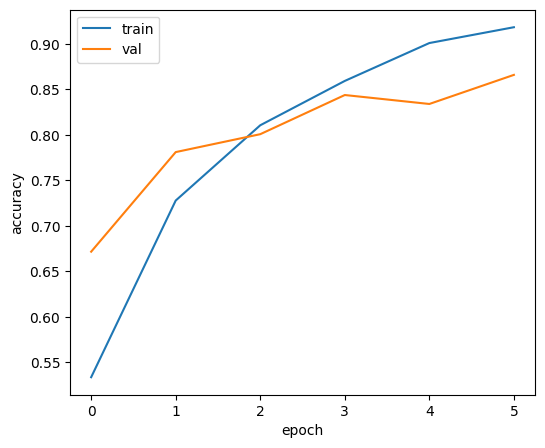

In [29]:
plt.figure(figsize=(6, 5)) # width, height (inches)
plt.plot(history.history['accuracy'][:21])
plt.plot(history.history['val_accuracy'][:21])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

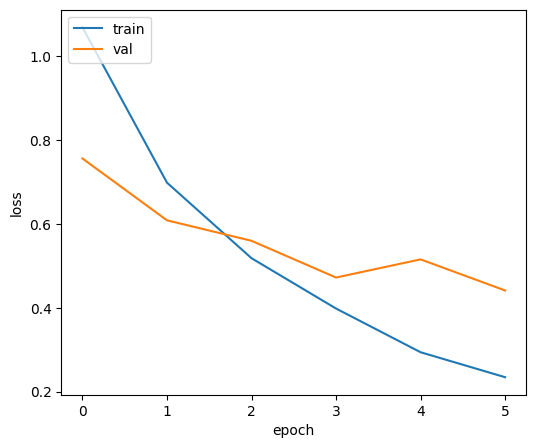

In [30]:
plt.figure(figsize=(6, 5)) # width, height (inches)
plt.plot(history.history['loss'][:21])
plt.plot(history.history['val_loss'][:21])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Prediction

In [42]:


import os
from multiprocessing import Pool

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from scipy.sparse import lil_matrix

import tensorflow as tf
from tqdm import tqdm

import librosa
from pydub import AudioSegment
from pydub.utils import make_chunks
from IPython.display import Audio

,path,class_name,class_label
10179,archive/train//Song Sparrow/246812-4.wav,Song Sparrow,[0]
6209,archive/train//American Robin/483578-0.wav,American Robin,[3]
2425,archive/train//Northern Cardinal/362613-5.wav,Northern Cardinal,[2]
8498,archive/train//Northern Mockingbird/14213-3.wav,Northern Mockingbird,[1]
8837,archive/train//Northern Mockingbird/321899-6.wav,Northern Mockingbird,[1]


In [48]:


def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1  #eg: sm[0, [2,3]] = 1
    return sm

def get_f1_score(y_true, y_pred):
  y_true_sm = label_to_sm(labels=y_true, n_classes=5)
  y_pred_sm = label_to_sm(labels=y_pred, n_classes=5)
  metric = f1_score(y_true=y_true_sm, y_pred=y_pred_sm, average='weighted')
  return metric

def get_sm(y_true, y_pred):
  y_true_sm = label_to_sm(labels=y_true, n_classes=5)
  y_pred_sm = label_to_sm(labels=y_pred, n_classes=5)
  return y_true_sm, y_pred_sm

In [47]:
def get_split(path):

  print(path)
  myaudio = AudioSegment.from_file(path , "wav")

  chunk_length_ms = 1000 # pydub calculates in millisec
  chunks = make_chunks(myaudio, chunk_length_ms) 
  paths =[]

  for i, chunk in enumerate(chunks):
      chunk_name = "chunk{0}.wav".format(i)
      paths.append(chunk_name)
      chunk.export(chunk_name, format="wav")

  return paths



def get_feature(path):
    y, sr = librosa.load(path)

    audio_arrays = [y]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=MAX_SEQ_LENGTH,
        truncation=True,
        padding=True,
    )
    a = inputs['input_values'][0]
    a = a.reshape((1,16000))
    b = inputs['attention_mask'][0]
    b = b.reshape((1,16000))

    xq = {'input_values': a, 'attention_mask': b}

    return xq


def get_xqs(paths):
  xqs = []
  for i in range(3): #only using first 6 chunks
    t = get_feature(paths[i])
    xqs.append(t)
  return xqs


In [37]:
def get_probs(model, xqs):
  probs = []
  for xq in xqs:
    p = model.predict(xq, verbose = 0)
    probs.append(p)
  return np.array(probs)

def predict(model, xqs, num_species):
  probs = get_probs(model, xqs)
  # aggregrate
  s = np.max(probs, axis = 0)
  if num_species == 2:
    n = 2
  else:
    n = 1
  labels = np.argsort(s[0])[::-1][:n]
  print("lables",labels)
  return list(labels)

In [46]:
from tqdm import tqdm
from pydub import AudioSegment

def test(model, df, num_species):
  # print("succ")
  # print(test['class_label'])
  y_true = list(validation['class_label'])
  y_pred = []

  for i in tqdm(range(len(validation))):
    
    path = validation['path'][i]
    print(path)
    chunk_paths = get_split(path)
    
    xqs = get_xqs(chunk_paths)
    label = predict(model, xqs, num_species)
    y_pred.append(label)
  return y_true, y_pred



def evaluate(model, df_mix_2):
  y_true_2, y_pred_2 = test(model, tests, 5)

  score = get_f1_score(y_true_2, y_pred_2)

  return y_true_2, y_pred_2, score

In [43]:
y_true, y_pred, score = evaluate(model, validation)
score

  0%|                                                                                          | 0/814 [00:00<?, ?it/s]

C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\364588-17.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\364588-17.wav


  0%|                                                                                  | 1/814 [00:04<58:58,  4.35s/it]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-0.wav


  0%|▏                                                                                 | 2/814 [00:04<28:29,  2.11s/it]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-6.wav


  0%|▎                                                                                 | 3/814 [00:05<18:07,  1.34s/it]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466178-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466178-9.wav


  0%|▍                                                                                 | 4/814 [00:05<13:15,  1.02it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564319-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564319-10.wav


  1%|▌                                                                                 | 5/814 [00:06<10:27,  1.29it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-2.wav


  1%|▌                                                                                 | 6/814 [00:06<08:42,  1.55it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\408543-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\408543-4.wav


  1%|▋                                                                                 | 7/814 [00:06<07:21,  1.83it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165346-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165346-13.wav


  1%|▊                                                                                 | 8/814 [00:07<06:30,  2.06it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-10.wav


  1%|▉                                                                                 | 9/814 [00:07<05:57,  2.25it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\103059-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\103059-2.wav


  1%|▉                                                                                | 10/814 [00:08<05:47,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-4.wav


  1%|█                                                                                | 11/814 [00:08<05:47,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\463767-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\463767-2.wav


  1%|█▏                                                                               | 12/814 [00:08<05:47,  2.30it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-0.wav


  2%|█▎                                                                               | 13/814 [00:09<05:47,  2.31it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-7.wav


  2%|█▍                                                                               | 14/814 [00:09<05:52,  2.27it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\382878-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\382878-5.wav


  2%|█▍                                                                               | 15/814 [00:10<05:37,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142619-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142619-4.wav


  2%|█▌                                                                               | 16/814 [00:10<05:20,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-6.wav


  2%|█▋                                                                               | 17/814 [00:10<05:06,  2.60it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-1.wav


  2%|█▊                                                                               | 18/814 [00:11<05:01,  2.64it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323979-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323979-11.wav


  2%|█▉                                                                               | 19/814 [00:11<04:54,  2.70it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\235955-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\235955-5.wav


  2%|█▉                                                                               | 20/814 [00:11<04:53,  2.70it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-0.wav


  3%|██                                                                               | 21/814 [00:12<04:55,  2.69it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173150-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173150-5.wav


  3%|██▏                                                                              | 22/814 [00:12<04:56,  2.67it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-15.wav


  3%|██▎                                                                              | 23/814 [00:13<04:57,  2.66it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480224-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480224-7.wav


  3%|██▍                                                                              | 24/814 [00:13<05:07,  2.57it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-6.wav


  3%|██▍                                                                              | 25/814 [00:13<05:16,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-12.wav


  3%|██▌                                                                              | 26/814 [00:14<05:24,  2.43it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173148-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173148-0.wav


  3%|██▋                                                                              | 27/814 [00:14<05:28,  2.40it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\394057-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\394057-2.wav


  3%|██▊                                                                              | 28/814 [00:15<05:30,  2.38it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-4.wav


  4%|██▉                                                                              | 29/814 [00:15<05:29,  2.38it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-11.wav


  4%|██▉                                                                              | 30/814 [00:16<05:53,  2.22it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15269-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15269-6.wav


  4%|███                                                                              | 31/814 [00:16<05:41,  2.30it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-9.wav


  4%|███▏                                                                             | 32/814 [00:16<05:19,  2.45it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\469007-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\469007-10.wav


  4%|███▎                                                                             | 33/814 [00:17<05:04,  2.57it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-0.wav


  4%|███▍                                                                             | 34/814 [00:17<04:52,  2.66it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-10.wav


  4%|███▍                                                                             | 35/814 [00:17<04:44,  2.73it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217853-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217853-3.wav


  4%|███▌                                                                             | 36/814 [00:18<04:39,  2.78it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\22069-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\22069-1.wav


  5%|███▋                                                                             | 37/814 [00:18<04:38,  2.79it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\12578-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\12578-1.wav


  5%|███▊                                                                             | 38/814 [00:18<04:39,  2.78it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-8.wav


  5%|███▉                                                                             | 39/814 [00:19<04:38,  2.78it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\129646-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\129646-4.wav


  5%|███▉                                                                             | 40/814 [00:19<04:42,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\170052-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\170052-4.wav


  5%|████                                                                             | 41/814 [00:20<04:45,  2.71it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-10.wav


  5%|████▏                                                                            | 42/814 [00:20<04:43,  2.73it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\434169-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\434169-5.wav


  5%|████▎                                                                            | 43/814 [00:20<05:01,  2.56it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-12.wav


  5%|████▍                                                                            | 44/814 [00:21<05:12,  2.46it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-3.wav


  6%|████▍                                                                            | 45/814 [00:21<05:20,  2.40it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\184933-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\184933-11.wav


  6%|████▌                                                                            | 46/814 [00:22<05:24,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-12.wav


  6%|████▋                                                                            | 47/814 [00:22<05:23,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366597-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366597-1.wav


  6%|████▊                                                                            | 48/814 [00:23<05:25,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-13.wav


  6%|████▉                                                                            | 49/814 [00:23<05:27,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-4.wav


  6%|████▉                                                                            | 50/814 [00:23<05:27,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-1.wav


  6%|█████                                                                            | 51/814 [00:24<05:28,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\132864-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\132864-6.wav


  6%|█████▏                                                                           | 52/814 [00:24<05:24,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-1.wav


  7%|█████▎                                                                           | 53/814 [00:25<05:26,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\434169-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\434169-8.wav


  7%|█████▎                                                                           | 54/814 [00:25<05:25,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-6.wav


  7%|█████▍                                                                           | 55/814 [00:26<05:05,  2.48it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-2.wav


  7%|█████▌                                                                           | 56/814 [00:26<04:57,  2.55it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-11.wav


  7%|█████▋                                                                           | 57/814 [00:26<04:49,  2.62it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-5.wav


  7%|█████▊                                                                           | 58/814 [00:27<04:43,  2.67it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-5.wav


  7%|█████▊                                                                           | 59/814 [00:27<04:34,  2.75it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-3.wav


  7%|█████▉                                                                           | 60/814 [00:27<04:33,  2.75it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\172423-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\172423-4.wav


  7%|██████                                                                           | 61/814 [00:28<04:35,  2.73it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-7.wav


  8%|██████▏                                                                          | 62/814 [00:28<04:52,  2.57it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-10.wav


  8%|██████▎                                                                          | 63/814 [00:29<05:04,  2.47it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\477785-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\477785-3.wav


  8%|██████▎                                                                          | 64/814 [00:29<05:08,  2.43it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-6.wav


  8%|██████▍                                                                          | 65/814 [00:29<05:12,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320724-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320724-5.wav


  8%|██████▌                                                                          | 66/814 [00:30<05:17,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\140466-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\140466-1.wav


  8%|██████▋                                                                          | 67/814 [00:30<05:18,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190456-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190456-9.wav


  8%|██████▊                                                                          | 68/814 [00:31<05:19,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\382342-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\382342-6.wav


  8%|██████▊                                                                          | 69/814 [00:31<05:19,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446457-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446457-0.wav


  9%|██████▉                                                                          | 70/814 [00:32<05:19,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\560427-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\560427-0.wav


  9%|███████                                                                          | 71/814 [00:32<05:23,  2.30it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\189286-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\189286-8.wav


  9%|███████▏                                                                         | 72/814 [00:32<05:20,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362613-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362613-0.wav


  9%|███████▎                                                                         | 73/814 [00:33<05:21,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-1.wav


  9%|███████▎                                                                         | 74/814 [00:33<05:21,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-11.wav


  9%|███████▍                                                                         | 75/814 [00:34<05:18,  2.32it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320027-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320027-0.wav


  9%|███████▌                                                                         | 76/814 [00:34<05:01,  2.45it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\11846-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\11846-7.wav


  9%|███████▋                                                                         | 77/814 [00:34<04:48,  2.56it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-14.wav


 10%|███████▊                                                                         | 78/814 [00:35<04:36,  2.66it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313351-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313351-2.wav


 10%|███████▊                                                                         | 79/814 [00:35<04:28,  2.74it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121280-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121280-11.wav


 10%|███████▉                                                                         | 80/814 [00:35<04:23,  2.78it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\192423-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\192423-11.wav


 10%|████████                                                                         | 81/814 [00:36<04:42,  2.60it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-16.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-16.wav


 10%|████████▏                                                                        | 82/814 [00:36<04:53,  2.49it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-10.wav


 10%|████████▎                                                                        | 83/814 [00:37<04:58,  2.45it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\320469-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\320469-1.wav


 10%|████████▎                                                                        | 84/814 [00:37<05:03,  2.41it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-3.wav


 10%|████████▍                                                                        | 85/814 [00:38<05:04,  2.39it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\544966-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\544966-10.wav


 11%|████████▌                                                                        | 86/814 [00:38<05:06,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-5.wav


 11%|████████▋                                                                        | 87/814 [00:39<05:08,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564311-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564311-7.wav


 11%|████████▊                                                                        | 88/814 [00:39<05:08,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-12.wav


 11%|████████▊                                                                        | 89/814 [00:39<05:06,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-13.wav


 11%|████████▉                                                                        | 90/814 [00:40<05:07,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\393996-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\393996-8.wav


 11%|█████████                                                                        | 91/814 [00:40<04:51,  2.48it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375274-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375274-3.wav


 11%|█████████▏                                                                       | 92/814 [00:40<04:37,  2.60it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-3.wav


 11%|█████████▎                                                                       | 93/814 [00:41<04:29,  2.68it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-2.wav


 12%|█████████▎                                                                       | 94/814 [00:41<04:23,  2.73it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-0.wav


 12%|█████████▍                                                                       | 95/814 [00:42<04:19,  2.77it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-10.wav


 12%|█████████▌                                                                       | 96/814 [00:42<04:33,  2.62it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\382878-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\382878-6.wav


 12%|█████████▋                                                                       | 97/814 [00:42<04:45,  2.51it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-1.wav


 12%|█████████▊                                                                       | 98/814 [00:43<04:50,  2.46it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-12.wav


 12%|█████████▊                                                                       | 99/814 [00:43<04:55,  2.42it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466178-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466178-7.wav


 12%|█████████▊                                                                      | 100/814 [00:44<04:56,  2.41it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21732-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21732-0.wav


 12%|█████████▉                                                                      | 101/814 [00:44<04:57,  2.39it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-3.wav


 13%|██████████                                                                      | 102/814 [00:45<04:59,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322572-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322572-1.wav


 13%|██████████                                                                      | 103/814 [00:45<04:59,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-0.wav


 13%|██████████▏                                                                     | 104/814 [00:45<05:00,  2.37it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\177384-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\177384-12.wav


 13%|██████████▎                                                                     | 105/814 [00:46<04:44,  2.49it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412668-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412668-6.wav


 13%|██████████▍                                                                     | 106/814 [00:46<04:33,  2.59it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\319143-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\319143-9.wav


 13%|██████████▌                                                                     | 107/814 [00:46<04:23,  2.69it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111650-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111650-3.wav


 13%|██████████▌                                                                     | 108/814 [00:47<04:16,  2.75it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321927-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321927-4.wav


 13%|██████████▋                                                                     | 109/814 [00:47<04:14,  2.77it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317266-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317266-5.wav


 14%|██████████▊                                                                     | 110/814 [00:47<04:13,  2.78it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-10.wav


 14%|██████████▉                                                                     | 111/814 [00:48<04:15,  2.75it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-5.wav


 14%|███████████                                                                     | 112/814 [00:48<04:17,  2.73it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451370-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451370-8.wav


 14%|███████████                                                                     | 113/814 [00:49<04:18,  2.72it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-2.wav


 14%|███████████▏                                                                    | 114/814 [00:49<04:20,  2.69it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\416049-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\416049-4.wav


 14%|███████████▎                                                                    | 115/814 [00:49<04:20,  2.68it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\545900-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\545900-8.wav


 14%|███████████▍                                                                    | 116/814 [00:50<04:37,  2.51it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322887-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322887-3.wav


 14%|███████████▍                                                                    | 117/814 [00:50<04:48,  2.42it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-4.wav


 14%|███████████▌                                                                    | 118/814 [00:51<04:51,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\469605-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\469605-1.wav


 15%|███████████▋                                                                    | 119/814 [00:51<04:54,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-10.wav


 15%|███████████▊                                                                    | 120/814 [00:52<04:56,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-3.wav


 15%|███████████▉                                                                    | 121/814 [00:52<04:57,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-10.wav


 15%|███████████▉                                                                    | 122/814 [00:52<04:59,  2.31it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\469877-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\469877-0.wav


 15%|████████████                                                                    | 123/814 [00:53<04:57,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\406012-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\406012-9.wav


 15%|████████████▏                                                                   | 124/814 [00:53<04:56,  2.32it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\309650-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\309650-1.wav


 15%|████████████▎                                                                   | 125/814 [00:54<04:56,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-5.wav


 15%|████████████▍                                                                   | 126/814 [00:54<04:55,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322821-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322821-13.wav


 16%|████████████▍                                                                   | 127/814 [00:55<04:56,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\423504-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\423504-1.wav


 16%|████████████▌                                                                   | 128/814 [00:55<04:52,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-4.wav


 16%|████████████▋                                                                   | 129/814 [00:55<04:33,  2.51it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309928-5.wav


 16%|████████████▊                                                                   | 130/814 [00:56<04:23,  2.59it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-8.wav


 16%|████████████▊                                                                   | 131/814 [00:56<04:15,  2.68it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-10.wav


 16%|████████████▉                                                                   | 132/814 [00:56<04:11,  2.71it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351038-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351038-4.wav


 16%|█████████████                                                                   | 133/814 [00:57<04:05,  2.77it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-0.wav


 16%|█████████████▏                                                                  | 134/814 [00:57<04:05,  2.77it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-5.wav


 17%|█████████████▎                                                                  | 135/814 [00:57<04:04,  2.77it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-3.wav


 17%|█████████████▎                                                                  | 136/814 [00:58<04:04,  2.77it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-4.wav


 17%|█████████████▍                                                                  | 137/814 [00:58<04:08,  2.72it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-7.wav


 17%|█████████████▌                                                                  | 138/814 [00:59<04:08,  2.72it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490351-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490351-1.wav


 17%|█████████████▋                                                                  | 139/814 [00:59<04:10,  2.69it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-5.wav


 17%|█████████████▊                                                                  | 140/814 [00:59<04:26,  2.53it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-0.wav


 17%|█████████████▊                                                                  | 141/814 [01:00<04:33,  2.46it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564319-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564319-14.wav


 17%|█████████████▉                                                                  | 142/814 [01:00<04:39,  2.40it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125713-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125713-12.wav


 18%|██████████████                                                                  | 143/814 [01:01<04:43,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-12.wav


 18%|██████████████▏                                                                 | 144/814 [01:01<04:45,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-9.wav


 18%|██████████████▎                                                                 | 145/814 [01:02<04:46,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\306680-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\306680-1.wav


 18%|██████████████▎                                                                 | 146/814 [01:02<04:45,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-8.wav


 18%|██████████████▍                                                                 | 147/814 [01:02<04:43,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408810-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408810-1.wav


 18%|██████████████▌                                                                 | 148/814 [01:03<04:43,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-3.wav


 18%|██████████████▋                                                                 | 149/814 [01:03<04:45,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\269503-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\269503-4.wav


 18%|██████████████▋                                                                 | 150/814 [01:04<04:44,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-7.wav


 19%|██████████████▊                                                                 | 151/814 [01:04<04:45,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\477371-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\477371-5.wav


 19%|██████████████▉                                                                 | 152/814 [01:05<04:43,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-9.wav


 19%|███████████████                                                                 | 153/814 [01:05<04:28,  2.46it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-12.wav


 19%|███████████████▏                                                                | 154/814 [01:05<04:17,  2.57it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-2.wav


 19%|███████████████▏                                                                | 155/814 [01:06<04:08,  2.65it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\319833-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\319833-0.wav


 19%|███████████████▎                                                                | 156/814 [01:06<04:03,  2.71it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-1.wav


 19%|███████████████▍                                                                | 157/814 [01:06<04:00,  2.73it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321786-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321786-4.wav


 19%|███████████████▌                                                                | 158/814 [01:07<04:00,  2.73it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562449-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562449-0.wav


 20%|███████████████▋                                                                | 159/814 [01:07<03:59,  2.73it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\172442-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\172442-1.wav


 20%|███████████████▋                                                                | 160/814 [01:07<04:03,  2.68it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111646-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111646-0.wav


 20%|███████████████▊                                                                | 161/814 [01:08<04:01,  2.70it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562449-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562449-10.wav


 20%|███████████████▉                                                                | 162/814 [01:08<04:03,  2.68it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13610-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13610-3.wav


 20%|████████████████                                                                | 163/814 [01:09<04:06,  2.64it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\549591-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\549591-4.wav


 20%|████████████████                                                                | 164/814 [01:09<04:21,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217824-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217824-9.wav


 20%|████████████████▏                                                               | 165/814 [01:09<04:29,  2.41it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-3.wav


 20%|████████████████▎                                                               | 166/814 [01:10<04:35,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-3.wav


 21%|████████████████▍                                                               | 167/814 [01:10<04:37,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460742-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460742-6.wav


 21%|████████████████▌                                                               | 168/814 [01:11<04:39,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-14.wav


 21%|████████████████▌                                                               | 169/814 [01:11<04:39,  2.30it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321942-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321942-8.wav


 21%|████████████████▋                                                               | 170/814 [01:12<04:40,  2.30it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\102948-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\102948-1.wav


 21%|████████████████▊                                                               | 171/814 [01:12<04:40,  2.29it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470299-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470299-5.wav


 21%|████████████████▉                                                               | 172/814 [01:13<04:39,  2.30it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367706-9.wav


 21%|█████████████████                                                               | 173/814 [01:13<04:38,  2.30it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-6.wav


 21%|█████████████████                                                               | 174/814 [01:13<04:36,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\370494-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\370494-7.wav


 21%|█████████████████▏                                                              | 175/814 [01:14<04:35,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-0.wav


 22%|█████████████████▎                                                              | 176/814 [01:14<04:36,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\500148-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\500148-6.wav


 22%|█████████████████▍                                                              | 177/814 [01:15<04:34,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205810-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205810-7.wav


 22%|█████████████████▍                                                              | 178/814 [01:15<04:34,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\312736-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\312736-10.wav


 22%|█████████████████▌                                                              | 179/814 [01:15<04:16,  2.48it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-8.wav


 22%|█████████████████▋                                                              | 180/814 [01:16<04:05,  2.58it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-4.wav


 22%|█████████████████▊                                                              | 181/814 [01:16<03:59,  2.65it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\181738-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\181738-1.wav


 22%|█████████████████▉                                                              | 182/814 [01:17<03:51,  2.73it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\560427-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\560427-3.wav


 22%|█████████████████▉                                                              | 183/814 [01:17<03:50,  2.73it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357943-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357943-4.wav


 23%|██████████████████                                                              | 184/814 [01:17<04:04,  2.58it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-11.wav


 23%|██████████████████▏                                                             | 185/814 [01:18<04:12,  2.49it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217851-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217851-10.wav


 23%|██████████████████▎                                                             | 186/814 [01:18<04:18,  2.43it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\534181-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\534181-9.wav


 23%|██████████████████▍                                                             | 187/814 [01:19<04:21,  2.40it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-0.wav


 23%|██████████████████▍                                                             | 188/814 [01:19<04:23,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-12.wav


 23%|██████████████████▌                                                             | 189/814 [01:19<04:25,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-10.wav


 23%|██████████████████▋                                                             | 190/814 [01:20<04:24,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-2.wav


 23%|██████████████████▊                                                             | 191/814 [01:20<04:24,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\557029-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\557029-9.wav


 24%|██████████████████▊                                                             | 192/814 [01:21<04:22,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-0.wav


 24%|██████████████████▉                                                             | 193/814 [01:21<04:11,  2.47it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-6.wav


 24%|███████████████████                                                             | 194/814 [01:21<04:02,  2.56it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-4.wav


 24%|███████████████████▏                                                            | 195/814 [01:22<03:53,  2.65it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\559314-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\559314-2.wav


 24%|███████████████████▎                                                            | 196/814 [01:22<03:49,  2.69it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-11.wav


 24%|███████████████████▎                                                            | 197/814 [01:23<03:43,  2.76it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-9.wav


 24%|███████████████████▍                                                            | 198/814 [01:23<03:42,  2.76it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368615-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368615-8.wav


 24%|███████████████████▌                                                            | 199/814 [01:23<03:44,  2.74it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-4.wav


 25%|███████████████████▋                                                            | 200/814 [01:24<03:43,  2.75it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-1.wav


 25%|███████████████████▊                                                            | 201/814 [01:24<03:45,  2.72it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\71208-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\71208-9.wav


 25%|███████████████████▊                                                            | 202/814 [01:24<03:48,  2.68it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-0.wav


 25%|███████████████████▉                                                            | 203/814 [01:25<03:49,  2.66it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-8.wav


 25%|████████████████████                                                            | 204/814 [01:25<04:03,  2.50it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-11.wav


 25%|████████████████████▏                                                           | 205/814 [01:26<04:10,  2.43it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-5.wav


 25%|████████████████████▏                                                           | 206/814 [01:26<04:18,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\542090-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\542090-3.wav


 25%|████████████████████▎                                                           | 207/814 [01:27<04:22,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466697-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466697-7.wav


 26%|████████████████████▍                                                           | 208/814 [01:27<04:20,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\469877-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\469877-2.wav


 26%|████████████████████▌                                                           | 209/814 [01:27<04:21,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-7.wav


 26%|████████████████████▋                                                           | 210/814 [01:28<04:20,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322884-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322884-3.wav


 26%|████████████████████▋                                                           | 211/814 [01:28<04:20,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-7.wav


 26%|████████████████████▊                                                           | 212/814 [01:29<04:18,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-12.wav


 26%|████████████████████▉                                                           | 213/814 [01:29<04:18,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179351-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179351-10.wav


 26%|█████████████████████                                                           | 214/814 [01:30<04:16,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\54652-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\54652-0.wav


 26%|█████████████████████▏                                                          | 215/814 [01:30<04:14,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-3.wav


 27%|█████████████████████▏                                                          | 216/814 [01:30<03:59,  2.49it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\319833-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\319833-13.wav


 27%|█████████████████████▎                                                          | 217/814 [01:31<03:52,  2.56it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\343926-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\343926-3.wav


 27%|█████████████████████▍                                                          | 218/814 [01:31<03:43,  2.67it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-7.wav


 27%|█████████████████████▌                                                          | 219/814 [01:31<03:42,  2.68it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\557029-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\557029-11.wav


 27%|█████████████████████▌                                                          | 220/814 [01:32<03:37,  2.73it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412668-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412668-4.wav


 27%|█████████████████████▋                                                          | 221/814 [01:32<03:37,  2.73it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\325378-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\325378-10.wav


 27%|█████████████████████▊                                                          | 222/814 [01:33<03:41,  2.67it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178016-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178016-4.wav


 27%|█████████████████████▉                                                          | 223/814 [01:33<03:50,  2.57it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\233122-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\233122-4.wav


 28%|██████████████████████                                                          | 224/814 [01:33<03:57,  2.49it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172648-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172648-12.wav


 28%|██████████████████████                                                          | 225/814 [01:34<04:01,  2.44it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-0.wav


 28%|██████████████████████▏                                                         | 226/814 [01:34<04:04,  2.41it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\169226-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\169226-6.wav


 28%|██████████████████████▎                                                         | 227/814 [01:35<04:10,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\34576-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\34576-8.wav


 28%|██████████████████████▍                                                         | 228/814 [01:35<04:16,  2.29it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\288000-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\288000-7.wav


 28%|██████████████████████▌                                                         | 229/814 [01:36<04:19,  2.25it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-0.wav


 28%|██████████████████████▌                                                         | 230/814 [01:36<04:14,  2.29it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\288000-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\288000-2.wav


 28%|██████████████████████▋                                                         | 231/814 [01:36<04:14,  2.29it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\343928-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\343928-1.wav


 29%|██████████████████████▊                                                         | 232/814 [01:37<04:14,  2.29it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165292-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165292-2.wav


 29%|██████████████████████▉                                                         | 233/814 [01:37<04:13,  2.29it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\464766-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\464766-14.wav


 29%|██████████████████████▉                                                         | 234/814 [01:38<04:10,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-7.wav


 29%|███████████████████████                                                         | 235/814 [01:38<04:09,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217911-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217911-6.wav


 29%|███████████████████████▏                                                        | 236/814 [01:39<04:07,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-6.wav


 29%|███████████████████████▎                                                        | 237/814 [01:39<04:08,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363142-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363142-10.wav


 29%|███████████████████████▍                                                        | 238/814 [01:39<04:03,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317266-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317266-4.wav


 29%|███████████████████████▍                                                        | 239/814 [01:40<03:49,  2.51it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\82113-0.wav


 29%|███████████████████████▌                                                        | 240/814 [01:40<03:42,  2.58it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-0.wav


 30%|███████████████████████▋                                                        | 241/814 [01:40<03:35,  2.66it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\481115-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\481115-12.wav


 30%|███████████████████████▊                                                        | 242/814 [01:41<04:34,  2.08it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321789-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321789-4.wav


 30%|███████████████████████▉                                                        | 243/814 [01:42<04:14,  2.24it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\175226-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\175226-9.wav


 30%|███████████████████████▉                                                        | 244/814 [01:42<03:59,  2.38it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-14.wav


 30%|████████████████████████                                                        | 245/814 [01:42<03:53,  2.43it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552447-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552447-0.wav


 30%|████████████████████████▏                                                       | 246/814 [01:43<03:48,  2.49it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-2.wav


 30%|████████████████████████▎                                                       | 247/814 [01:43<03:57,  2.39it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-2.wav


 30%|████████████████████████▎                                                       | 248/814 [01:44<04:00,  2.35it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-11.wav


 31%|████████████████████████▍                                                       | 249/814 [01:44<04:04,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\469007-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\469007-1.wav


 31%|████████████████████████▌                                                       | 250/814 [01:44<04:05,  2.29it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322565-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322565-6.wav


 31%|████████████████████████▋                                                       | 251/814 [01:45<04:06,  2.28it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320027-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320027-4.wav


 31%|████████████████████████▊                                                       | 252/814 [01:45<04:06,  2.28it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-1.wav


 31%|████████████████████████▊                                                       | 253/814 [01:46<04:04,  2.30it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-5.wav


 31%|████████████████████████▉                                                       | 254/814 [01:46<04:02,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-2.wav


 31%|█████████████████████████                                                       | 255/814 [01:47<04:02,  2.30it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-11.wav


 31%|█████████████████████████▏                                                      | 256/814 [01:47<04:02,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\470300-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\470300-1.wav


 32%|█████████████████████████▎                                                      | 257/814 [01:48<03:59,  2.32it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-3.wav


 32%|█████████████████████████▎                                                      | 258/814 [01:48<04:00,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\20420-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\20420-10.wav


 32%|█████████████████████████▍                                                      | 259/814 [01:48<03:58,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121281-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121281-12.wav


 32%|█████████████████████████▌                                                      | 260/814 [01:49<03:59,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565240-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565240-8.wav


 32%|█████████████████████████▋                                                      | 261/814 [01:49<03:54,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-12.wav


 32%|█████████████████████████▋                                                      | 262/814 [01:50<03:39,  2.51it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-6.wav


 32%|█████████████████████████▊                                                      | 263/814 [01:50<03:31,  2.61it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\381570-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\381570-0.wav


 32%|█████████████████████████▉                                                      | 264/814 [01:50<03:25,  2.68it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562221-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562221-5.wav


 33%|██████████████████████████                                                      | 265/814 [01:51<03:18,  2.77it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-11.wav


 33%|██████████████████████████▏                                                     | 266/814 [01:51<03:15,  2.80it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-2.wav


 33%|██████████████████████████▏                                                     | 267/814 [01:51<03:17,  2.76it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111655-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111655-4.wav


 33%|██████████████████████████▎                                                     | 268/814 [01:52<03:15,  2.79it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-11.wav


 33%|██████████████████████████▍                                                     | 269/814 [01:52<03:27,  2.63it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351082-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351082-10.wav


 33%|██████████████████████████▌                                                     | 270/814 [01:53<03:37,  2.50it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205810-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205810-6.wav


 33%|██████████████████████████▋                                                     | 271/814 [01:53<03:42,  2.44it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451372-8.wav


 33%|██████████████████████████▋                                                     | 272/814 [01:53<03:45,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480032-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480032-8.wav


 34%|██████████████████████████▊                                                     | 273/814 [01:54<03:49,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-1.wav


 34%|██████████████████████████▉                                                     | 274/814 [01:54<03:49,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173148-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173148-10.wav


 34%|███████████████████████████                                                     | 275/814 [01:55<03:49,  2.35it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-13.wav


 34%|███████████████████████████▏                                                    | 276/814 [01:55<03:49,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-12.wav


 34%|███████████████████████████▏                                                    | 277/814 [01:56<03:49,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322734-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322734-0.wav


 34%|███████████████████████████▎                                                    | 278/814 [01:56<03:49,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-17.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-17.wav


 34%|███████████████████████████▍                                                    | 279/814 [01:56<03:49,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-1.wav


 34%|███████████████████████████▌                                                    | 280/814 [01:57<03:45,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\367008-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\367008-10.wav


 35%|███████████████████████████▌                                                    | 281/814 [01:57<03:34,  2.49it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\317019-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\317019-3.wav


 35%|███████████████████████████▋                                                    | 282/814 [01:58<03:23,  2.62it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\137583-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\137583-5.wav


 35%|███████████████████████████▊                                                    | 283/814 [01:58<03:17,  2.69it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220402-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220402-2.wav


 35%|███████████████████████████▉                                                    | 284/814 [01:58<03:12,  2.75it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\479482-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\479482-13.wav


 35%|████████████████████████████                                                    | 285/814 [01:59<03:07,  2.82it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-15.wav


 35%|████████████████████████████                                                    | 286/814 [01:59<03:07,  2.81it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-1.wav


 35%|████████████████████████████▏                                                   | 287/814 [01:59<03:07,  2.81it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-7.wav


 35%|████████████████████████████▎                                                   | 288/814 [02:00<03:08,  2.79it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\175222-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\175222-9.wav


 36%|████████████████████████████▍                                                   | 289/814 [02:00<03:07,  2.80it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\409007-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\409007-10.wav


 36%|████████████████████████████▌                                                   | 290/814 [02:00<03:08,  2.78it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-5.wav


 36%|████████████████████████████▌                                                   | 291/814 [02:01<03:10,  2.75it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\493448-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\493448-7.wav


 36%|████████████████████████████▋                                                   | 292/814 [02:01<03:22,  2.58it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-9.wav


 36%|████████████████████████████▊                                                   | 293/814 [02:02<03:31,  2.46it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111650-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111650-7.wav


 36%|████████████████████████████▉                                                   | 294/814 [02:02<03:35,  2.41it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\423438-8.wav


 36%|████████████████████████████▉                                                   | 295/814 [02:02<03:37,  2.39it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\143800-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\143800-2.wav


 36%|█████████████████████████████                                                   | 296/814 [02:03<03:39,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552447-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552447-8.wav


 36%|█████████████████████████████▏                                                  | 297/814 [02:03<03:39,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121281-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121281-9.wav


 37%|█████████████████████████████▎                                                  | 298/814 [02:04<03:39,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\212943-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\212943-12.wav


 37%|█████████████████████████████▍                                                  | 299/814 [02:04<03:41,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322884-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322884-11.wav


 37%|█████████████████████████████▍                                                  | 300/814 [02:05<03:42,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480224-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480224-3.wav


 37%|█████████████████████████████▌                                                  | 301/814 [02:05<03:40,  2.32it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-3.wav


 37%|█████████████████████████████▋                                                  | 302/814 [02:05<03:39,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-1.wav


 37%|█████████████████████████████▊                                                  | 303/814 [02:06<03:38,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\246812-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\246812-2.wav


 37%|█████████████████████████████▉                                                  | 304/814 [02:06<03:27,  2.45it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\551290-11.wav


 37%|█████████████████████████████▉                                                  | 305/814 [02:07<03:16,  2.59it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-5.wav


 38%|██████████████████████████████                                                  | 306/814 [02:07<03:13,  2.63it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-6.wav


 38%|██████████████████████████████▏                                                 | 307/814 [02:07<03:09,  2.68it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109034-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109034-6.wav


 38%|██████████████████████████████▎                                                 | 308/814 [02:08<03:04,  2.75it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-0.wav


 38%|██████████████████████████████▎                                                 | 309/814 [02:08<03:07,  2.69it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-6.wav


 38%|██████████████████████████████▍                                                 | 310/814 [02:09<03:16,  2.57it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-0.wav


 38%|██████████████████████████████▌                                                 | 311/814 [02:09<03:24,  2.46it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-14.wav


 38%|██████████████████████████████▋                                                 | 312/814 [02:09<03:28,  2.41it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128904-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128904-10.wav


 38%|██████████████████████████████▊                                                 | 313/814 [02:10<03:30,  2.38it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\109668-9.wav


 39%|██████████████████████████████▊                                                 | 314/814 [02:10<03:31,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-0.wav


 39%|██████████████████████████████▉                                                 | 315/814 [02:11<03:31,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-5.wav


 39%|███████████████████████████████                                                 | 316/814 [02:11<03:33,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-1.wav


 39%|███████████████████████████████▏                                                | 317/814 [02:12<03:32,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\266643-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\266643-3.wav


 39%|███████████████████████████████▎                                                | 318/814 [02:12<03:31,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-0.wav


 39%|███████████████████████████████▎                                                | 319/814 [02:12<03:31,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220401-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220401-5.wav


 39%|███████████████████████████████▍                                                | 320/814 [02:13<03:31,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-10.wav


 39%|███████████████████████████████▌                                                | 321/814 [02:13<03:32,  2.32it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-7.wav


 40%|███████████████████████████████▋                                                | 322/814 [02:14<03:30,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133568-5.wav


 40%|███████████████████████████████▋                                                | 323/814 [02:14<03:29,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-4.wav


 40%|███████████████████████████████▊                                                | 324/814 [02:15<03:29,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-4.wav


 40%|███████████████████████████████▉                                                | 325/814 [02:15<03:18,  2.47it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-2.wav


 40%|████████████████████████████████                                                | 326/814 [02:15<03:09,  2.57it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-0.wav


 40%|████████████████████████████████▏                                               | 327/814 [02:16<03:02,  2.66it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217833-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217833-14.wav


 40%|████████████████████████████████▏                                               | 328/814 [02:16<02:57,  2.74it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-6.wav


 40%|████████████████████████████████▎                                               | 329/814 [02:16<02:54,  2.78it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-7.wav


 41%|████████████████████████████████▍                                               | 330/814 [02:17<03:05,  2.61it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-3.wav


 41%|████████████████████████████████▌                                               | 331/814 [02:17<03:12,  2.51it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\246812-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\246812-5.wav


 41%|████████████████████████████████▋                                               | 332/814 [02:18<03:16,  2.45it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-0.wav


 41%|████████████████████████████████▋                                               | 333/814 [02:18<03:17,  2.44it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357031-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357031-6.wav


 41%|████████████████████████████████▊                                               | 334/814 [02:18<03:19,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-5.wav


 41%|████████████████████████████████▉                                               | 335/814 [02:19<03:20,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111670-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111670-6.wav


 41%|█████████████████████████████████                                               | 336/814 [02:19<03:21,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\12577-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\12577-10.wav


 41%|█████████████████████████████████                                               | 337/814 [02:20<03:23,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-0.wav


 42%|█████████████████████████████████▏                                              | 338/814 [02:20<03:21,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21732-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21732-1.wav


 42%|█████████████████████████████████▎                                              | 339/814 [02:21<03:21,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-1.wav


 42%|█████████████████████████████████▍                                              | 340/814 [02:21<03:21,  2.35it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\338199-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\338199-10.wav


 42%|█████████████████████████████████▌                                              | 341/814 [02:21<03:20,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-7.wav


 42%|█████████████████████████████████▌                                              | 342/814 [02:22<03:16,  2.40it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-2.wav


 42%|█████████████████████████████████▋                                              | 343/814 [02:22<03:05,  2.54it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-17.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-17.wav


 42%|█████████████████████████████████▊                                              | 344/814 [02:22<02:59,  2.62it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\269503-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\269503-3.wav


 42%|█████████████████████████████████▉                                              | 345/814 [02:23<02:53,  2.71it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172648-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172648-14.wav


 43%|██████████████████████████████████                                              | 346/814 [02:23<02:48,  2.77it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\184933-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\184933-0.wav


 43%|██████████████████████████████████                                              | 347/814 [02:24<02:48,  2.78it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-10.wav


 43%|██████████████████████████████████▏                                             | 348/814 [02:24<02:56,  2.63it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-5.wav


 43%|██████████████████████████████████▎                                             | 349/814 [02:24<03:03,  2.53it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-11.wav


 43%|██████████████████████████████████▍                                             | 350/814 [02:25<03:09,  2.45it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-9.wav


 43%|██████████████████████████████████▍                                             | 351/814 [02:25<03:12,  2.40it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-0.wav


 43%|██████████████████████████████████▌                                             | 352/814 [02:26<03:13,  2.39it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\211633-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\211633-5.wav


 43%|██████████████████████████████████▋                                             | 353/814 [02:26<03:12,  2.39it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-13.wav


 43%|██████████████████████████████████▊                                             | 354/814 [02:27<03:13,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-8.wav


 44%|██████████████████████████████████▉                                             | 355/814 [02:27<03:13,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\545900-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\545900-3.wav


 44%|██████████████████████████████████▉                                             | 356/814 [02:27<03:13,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125718-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125718-6.wav


 44%|███████████████████████████████████                                             | 357/814 [02:28<03:13,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-13.wav


 44%|███████████████████████████████████▏                                            | 358/814 [02:28<03:12,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172494-15.wav


 44%|███████████████████████████████████▎                                            | 359/814 [02:29<03:08,  2.42it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-11.wav


 44%|███████████████████████████████████▍                                            | 360/814 [02:29<02:57,  2.55it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\368065-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\368065-4.wav


 44%|███████████████████████████████████▍                                            | 361/814 [02:29<02:50,  2.66it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-8.wav


 44%|███████████████████████████████████▌                                            | 362/814 [02:30<02:45,  2.73it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-6.wav


 45%|███████████████████████████████████▋                                            | 363/814 [02:30<02:42,  2.77it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\131455-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\131455-4.wav


 45%|███████████████████████████████████▊                                            | 364/814 [02:30<02:39,  2.83it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-0.wav


 45%|███████████████████████████████████▊                                            | 365/814 [02:31<02:39,  2.82it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-5.wav


 45%|███████████████████████████████████▉                                            | 366/814 [02:31<02:39,  2.81it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552450-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\552450-1.wav


 45%|████████████████████████████████████                                            | 367/814 [02:31<02:39,  2.81it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-15.wav


 45%|████████████████████████████████████▏                                           | 368/814 [02:32<02:39,  2.79it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\282625-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\282625-2.wav


 45%|████████████████████████████████████▎                                           | 369/814 [02:32<02:40,  2.77it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-6.wav


 45%|████████████████████████████████████▎                                           | 370/814 [02:33<02:42,  2.74it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\14172-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\14172-11.wav


 46%|████████████████████████████████████▍                                           | 371/814 [02:33<02:54,  2.53it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\312736-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\312736-5.wav


 46%|████████████████████████████████████▌                                           | 372/814 [02:33<03:02,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351065-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351065-4.wav


 46%|████████████████████████████████████▋                                           | 373/814 [02:34<03:09,  2.32it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\483978-2.wav


 46%|████████████████████████████████████▊                                           | 374/814 [02:34<03:08,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-10.wav


 46%|████████████████████████████████████▊                                           | 375/814 [02:35<03:09,  2.31it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\78683-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\78683-10.wav


 46%|████████████████████████████████████▉                                           | 376/814 [02:35<03:09,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-10.wav


 46%|█████████████████████████████████████                                           | 377/814 [02:36<03:09,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-7.wav


 46%|█████████████████████████████████████▏                                          | 378/814 [02:36<03:08,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190526-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190526-1.wav


 47%|█████████████████████████████████████▏                                          | 379/814 [02:37<03:09,  2.30it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179353-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179353-9.wav


 47%|█████████████████████████████████████▎                                          | 380/814 [02:37<03:08,  2.30it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\13602-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\13602-1.wav


 47%|█████████████████████████████████████▍                                          | 381/814 [02:37<03:07,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165303-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165303-3.wav


 47%|█████████████████████████████████████▌                                          | 382/814 [02:38<03:05,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165345-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165345-2.wav


 47%|█████████████████████████████████████▋                                          | 383/814 [02:38<03:04,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-6.wav


 47%|█████████████████████████████████████▋                                          | 384/814 [02:39<03:03,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\170052-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\170052-13.wav


 47%|█████████████████████████████████████▊                                          | 385/814 [02:39<03:03,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\20420-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\20420-5.wav


 47%|█████████████████████████████████████▉                                          | 386/814 [02:39<03:02,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\175226-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\175226-3.wav


 48%|██████████████████████████████████████                                          | 387/814 [02:40<03:01,  2.36it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\362470-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\362470-5.wav


 48%|██████████████████████████████████████▏                                         | 388/814 [02:40<02:51,  2.48it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179351-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179351-2.wav


 48%|██████████████████████████████████████▏                                         | 389/814 [02:41<02:43,  2.60it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61472-8.wav


 48%|██████████████████████████████████████▎                                         | 390/814 [02:41<02:38,  2.68it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-1.wav


 48%|██████████████████████████████████████▍                                         | 391/814 [02:41<02:34,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-0.wav


 48%|██████████████████████████████████████▌                                         | 392/814 [02:42<02:30,  2.81it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-4.wav


 48%|██████████████████████████████████████▌                                         | 393/814 [02:42<02:31,  2.77it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\336819-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\336819-10.wav


 48%|██████████████████████████████████████▋                                         | 394/814 [02:42<02:31,  2.77it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\282625-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\282625-4.wav


 49%|██████████████████████████████████████▊                                         | 395/814 [02:43<02:31,  2.76it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\376028-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\376028-2.wav


 49%|██████████████████████████████████████▉                                         | 396/814 [02:43<02:32,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408811-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408811-3.wav


 49%|███████████████████████████████████████                                         | 397/814 [02:43<02:34,  2.70it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\474134-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\474134-11.wav


 49%|███████████████████████████████████████                                         | 398/814 [02:44<02:35,  2.68it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165272-2.wav


 49%|███████████████████████████████████████▏                                        | 399/814 [02:44<02:43,  2.54it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321945-12.wav


 49%|███████████████████████████████████████▎                                        | 400/814 [02:45<02:49,  2.44it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\542090-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\542090-0.wav


 49%|███████████████████████████████████████▍                                        | 401/814 [02:45<02:51,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\302932-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\302932-6.wav


 49%|███████████████████████████████████████▌                                        | 402/814 [02:46<02:54,  2.36it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-13.wav


 50%|███████████████████████████████████████▌                                        | 403/814 [02:46<02:55,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111670-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111670-14.wav


 50%|███████████████████████████████████████▋                                        | 404/814 [02:46<02:55,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-8.wav


 50%|███████████████████████████████████████▊                                        | 405/814 [02:47<02:56,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\105818-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\105818-8.wav


 50%|███████████████████████████████████████▉                                        | 406/814 [02:47<02:54,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-7.wav


 50%|████████████████████████████████████████                                        | 407/814 [02:48<02:55,  2.32it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541496-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541496-8.wav


 50%|████████████████████████████████████████                                        | 408/814 [02:48<02:54,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351058-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351058-12.wav


 50%|████████████████████████████████████████▏                                       | 409/814 [02:49<02:54,  2.32it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-2.wav


 50%|████████████████████████████████████████▎                                       | 410/814 [02:49<02:52,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\175509-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\175509-4.wav


 50%|████████████████████████████████████████▍                                       | 411/814 [02:49<02:52,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\465907-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\465907-10.wav


 51%|████████████████████████████████████████▍                                       | 412/814 [02:50<02:52,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351065-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351065-6.wav


 51%|████████████████████████████████████████▌                                       | 413/814 [02:50<02:52,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-6.wav


 51%|████████████████████████████████████████▋                                       | 414/814 [02:51<02:50,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\373569-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\373569-7.wav


 51%|████████████████████████████████████████▊                                       | 415/814 [02:51<02:50,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-1.wav


 51%|████████████████████████████████████████▉                                       | 416/814 [02:52<02:50,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-5.wav


 51%|████████████████████████████████████████▉                                       | 417/814 [02:52<02:49,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-12.wav


 51%|█████████████████████████████████████████                                       | 418/814 [02:52<02:49,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111649-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111649-12.wav


 51%|█████████████████████████████████████████▏                                      | 419/814 [02:53<02:48,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-11.wav


 52%|█████████████████████████████████████████▎                                      | 420/814 [02:53<02:39,  2.47it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-17.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54019-17.wav


 52%|█████████████████████████████████████████▍                                      | 421/814 [02:54<02:31,  2.60it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\429249-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\429249-6.wav


 52%|█████████████████████████████████████████▍                                      | 422/814 [02:54<02:24,  2.70it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\481115-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\481115-7.wav


 52%|█████████████████████████████████████████▌                                      | 423/814 [02:54<02:22,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\54652-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\54652-7.wav


 52%|█████████████████████████████████████████▋                                      | 424/814 [02:55<02:19,  2.79it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\537326-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\537326-1.wav


 52%|█████████████████████████████████████████▊                                      | 425/814 [02:55<02:28,  2.62it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483628-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483628-2.wav


 52%|█████████████████████████████████████████▊                                      | 426/814 [02:56<02:33,  2.53it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-8.wav


 52%|█████████████████████████████████████████▉                                      | 427/814 [02:56<02:36,  2.47it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111669-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111669-0.wav


 53%|██████████████████████████████████████████                                      | 428/814 [02:56<02:39,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-9.wav


 53%|██████████████████████████████████████████▏                                     | 429/814 [02:57<02:39,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351182-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351182-1.wav


 53%|██████████████████████████████████████████▎                                     | 430/814 [02:57<02:40,  2.39it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-8.wav


 53%|██████████████████████████████████████████▎                                     | 431/814 [02:58<02:41,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\185605-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\185605-0.wav


 53%|██████████████████████████████████████████▍                                     | 432/814 [02:58<02:41,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\534181-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\534181-4.wav


 53%|██████████████████████████████████████████▌                                     | 433/814 [02:58<02:41,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-10.wav


 53%|██████████████████████████████████████████▋                                     | 434/814 [02:59<02:42,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-1.wav


 53%|██████████████████████████████████████████▊                                     | 435/814 [02:59<02:42,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323981-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323981-1.wav


 54%|██████████████████████████████████████████▊                                     | 436/814 [03:00<02:42,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-7.wav


 54%|██████████████████████████████████████████▉                                     | 437/814 [03:00<02:38,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-4.wav


 54%|███████████████████████████████████████████                                     | 438/814 [03:01<02:28,  2.53it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-1.wav


 54%|███████████████████████████████████████████▏                                    | 439/814 [03:01<02:23,  2.61it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-4.wav


 54%|███████████████████████████████████████████▏                                    | 440/814 [03:01<02:17,  2.72it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564311-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564311-2.wav


 54%|███████████████████████████████████████████▎                                    | 441/814 [03:02<02:15,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351083-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351083-8.wav


 54%|███████████████████████████████████████████▍                                    | 442/814 [03:02<02:13,  2.80it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\320719-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\320719-4.wav


 54%|███████████████████████████████████████████▌                                    | 443/814 [03:02<02:19,  2.66it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-10.wav


 55%|███████████████████████████████████████████▋                                    | 444/814 [03:03<02:27,  2.51it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-7.wav


 55%|███████████████████████████████████████████▋                                    | 445/814 [03:03<02:29,  2.47it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217835-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217835-7.wav


 55%|███████████████████████████████████████████▊                                    | 446/814 [03:04<02:32,  2.41it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\384027-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\384027-5.wav


 55%|███████████████████████████████████████████▉                                    | 447/814 [03:04<02:34,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-0.wav


 55%|████████████████████████████████████████████                                    | 448/814 [03:05<02:35,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-14.wav


 55%|████████████████████████████████████████████▏                                   | 449/814 [03:05<02:35,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-3.wav


 55%|████████████████████████████████████████████▏                                   | 450/814 [03:05<02:35,  2.35it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564324-8.wav


 55%|████████████████████████████████████████████▎                                   | 451/814 [03:06<02:35,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323979-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323979-1.wav


 56%|████████████████████████████████████████████▍                                   | 452/814 [03:06<02:31,  2.39it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-2.wav


 56%|████████████████████████████████████████████▌                                   | 453/814 [03:07<02:22,  2.53it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-7.wav


 56%|████████████████████████████████████████████▌                                   | 454/814 [03:07<02:17,  2.62it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-13.wav


 56%|████████████████████████████████████████████▋                                   | 455/814 [03:07<02:13,  2.70it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\417877-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\417877-2.wav


 56%|████████████████████████████████████████████▊                                   | 456/814 [03:08<02:09,  2.77it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142621-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142621-0.wav


 56%|████████████████████████████████████████████▉                                   | 457/814 [03:08<02:07,  2.79it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-15.wav


 56%|█████████████████████████████████████████████                                   | 458/814 [03:08<02:15,  2.62it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-9.wav


 56%|█████████████████████████████████████████████                                   | 459/814 [03:09<02:21,  2.52it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\470300-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\470300-8.wav


 57%|█████████████████████████████████████████████▏                                  | 460/814 [03:09<02:23,  2.46it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111644-9.wav


 57%|█████████████████████████████████████████████▎                                  | 461/814 [03:10<02:24,  2.44it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565242-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565242-6.wav


 57%|█████████████████████████████████████████████▍                                  | 462/814 [03:10<02:26,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408014-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408014-6.wav


 57%|█████████████████████████████████████████████▌                                  | 463/814 [03:10<02:26,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-2.wav


 57%|█████████████████████████████████████████████▌                                  | 464/814 [03:11<02:27,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-11.wav


 57%|█████████████████████████████████████████████▋                                  | 465/814 [03:11<02:26,  2.39it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-6.wav


 57%|█████████████████████████████████████████████▊                                  | 466/814 [03:12<02:26,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217913-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217913-1.wav


 57%|█████████████████████████████████████████████▉                                  | 467/814 [03:12<02:27,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408126-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408126-2.wav


 57%|█████████████████████████████████████████████▉                                  | 468/814 [03:13<02:24,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313352-7.wav


 58%|██████████████████████████████████████████████                                  | 469/814 [03:13<02:16,  2.54it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\72185-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\72185-1.wav


 58%|██████████████████████████████████████████████▏                                 | 470/814 [03:13<02:10,  2.63it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\205836-9.wav


 58%|██████████████████████████████████████████████▎                                 | 471/814 [03:14<02:06,  2.71it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-9.wav


 58%|██████████████████████████████████████████████▍                                 | 472/814 [03:14<02:03,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351091-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351091-3.wav


 58%|██████████████████████████████████████████████▍                                 | 473/814 [03:14<02:01,  2.81it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-8.wav


 58%|██████████████████████████████████████████████▌                                 | 474/814 [03:15<02:01,  2.80it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\73428-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\73428-6.wav


 58%|██████████████████████████████████████████████▋                                 | 475/814 [03:15<02:00,  2.81it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-0.wav


 58%|██████████████████████████████████████████████▊                                 | 476/814 [03:15<02:08,  2.63it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\129646-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\129646-11.wav


 59%|██████████████████████████████████████████████▉                                 | 477/814 [03:16<02:14,  2.51it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-10.wav


 59%|██████████████████████████████████████████████▉                                 | 478/814 [03:16<02:16,  2.46it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-1.wav


 59%|███████████████████████████████████████████████                                 | 479/814 [03:17<02:18,  2.42it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-12.wav


 59%|███████████████████████████████████████████████▏                                | 480/814 [03:17<02:19,  2.40it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-2.wav


 59%|███████████████████████████████████████████████▎                                | 481/814 [03:18<02:20,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\406012-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\406012-8.wav


 59%|███████████████████████████████████████████████▎                                | 482/814 [03:18<02:21,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-6.wav


 59%|███████████████████████████████████████████████▍                                | 483/814 [03:18<02:20,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133566-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133566-10.wav


 59%|███████████████████████████████████████████████▌                                | 484/814 [03:19<02:20,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-0.wav


 60%|███████████████████████████████████████████████▋                                | 485/814 [03:19<02:21,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165291-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165291-13.wav


 60%|███████████████████████████████████████████████▊                                | 486/814 [03:20<02:21,  2.33it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\58179-7.wav


 60%|███████████████████████████████████████████████▊                                | 487/814 [03:20<02:20,  2.32it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172647-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172647-0.wav


 60%|███████████████████████████████████████████████▉                                | 488/814 [03:21<02:17,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-16.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-16.wav


 60%|████████████████████████████████████████████████                                | 489/814 [03:21<02:10,  2.50it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\489315-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\489315-14.wav


 60%|████████████████████████████████████████████████▏                               | 490/814 [03:21<02:04,  2.60it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-5.wav


 60%|████████████████████████████████████████████████▎                               | 491/814 [03:22<02:01,  2.67it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351078-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351078-7.wav


 60%|████████████████████████████████████████████████▎                               | 492/814 [03:22<01:58,  2.72it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490353-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490353-5.wav


 61%|████████████████████████████████████████████████▍                               | 493/814 [03:22<01:57,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-5.wav


 61%|████████████████████████████████████████████████▌                               | 494/814 [03:23<02:02,  2.60it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\179182-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\179182-5.wav


 61%|████████████████████████████████████████████████▋                               | 495/814 [03:23<02:08,  2.49it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-13.wav


 61%|████████████████████████████████████████████████▋                               | 496/814 [03:24<02:10,  2.45it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-0.wav


 61%|████████████████████████████████████████████████▊                               | 497/814 [03:24<02:12,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\336819-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\336819-15.wav


 61%|████████████████████████████████████████████████▉                               | 498/814 [03:25<02:13,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322572-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322572-11.wav


 61%|█████████████████████████████████████████████████                               | 499/814 [03:25<02:12,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\309318-2.wav


 61%|█████████████████████████████████████████████████▏                              | 500/814 [03:25<02:13,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562221-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\562221-13.wav


 62%|█████████████████████████████████████████████████▏                              | 501/814 [03:26<02:12,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\139965-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\139965-11.wav


 62%|█████████████████████████████████████████████████▎                              | 502/814 [03:26<02:12,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-5.wav


 62%|█████████████████████████████████████████████████▍                              | 503/814 [03:27<02:13,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-2.wav


 62%|█████████████████████████████████████████████████▌                              | 504/814 [03:27<02:13,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-1.wav


 62%|█████████████████████████████████████████████████▋                              | 505/814 [03:27<02:05,  2.46it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490351-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\490351-12.wav


 62%|█████████████████████████████████████████████████▋                              | 506/814 [03:28<01:59,  2.57it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\493957-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\493957-5.wav


 62%|█████████████████████████████████████████████████▊                              | 507/814 [03:28<01:55,  2.65it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-4.wav


 62%|█████████████████████████████████████████████████▉                              | 508/814 [03:28<01:52,  2.72it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-11.wav


 63%|██████████████████████████████████████████████████                              | 509/814 [03:29<01:50,  2.75it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\319143-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\319143-6.wav


 63%|██████████████████████████████████████████████████                              | 510/814 [03:29<01:58,  2.57it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\310256-0.wav


 63%|██████████████████████████████████████████████████▏                             | 511/814 [03:30<02:02,  2.48it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\483878-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\483878-0.wav


 63%|██████████████████████████████████████████████████▎                             | 512/814 [03:30<02:04,  2.43it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-5.wav


 63%|██████████████████████████████████████████████████▍                             | 513/814 [03:31<02:06,  2.38it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111669-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111669-1.wav


 63%|██████████████████████████████████████████████████▌                             | 514/814 [03:31<02:05,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-4.wav


 63%|██████████████████████████████████████████████████▌                             | 515/814 [03:31<02:06,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\493957-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\493957-1.wav


 63%|██████████████████████████████████████████████████▋                             | 516/814 [03:32<02:07,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322822-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322822-2.wav


 64%|██████████████████████████████████████████████████▊                             | 517/814 [03:32<02:07,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-5.wav


 64%|██████████████████████████████████████████████████▉                             | 518/814 [03:33<02:08,  2.31it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-11.wav


 64%|███████████████████████████████████████████████████                             | 519/814 [03:33<02:07,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-10.wav


 64%|███████████████████████████████████████████████████                             | 520/814 [03:34<02:05,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-3.wav


 64%|███████████████████████████████████████████████████▏                            | 521/814 [03:34<01:57,  2.50it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-5.wav


 64%|███████████████████████████████████████████████████▎                            | 522/814 [03:34<01:52,  2.59it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18125-6.wav


 64%|███████████████████████████████████████████████████▍                            | 523/814 [03:35<01:49,  2.66it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-8.wav


 64%|███████████████████████████████████████████████████▍                            | 524/814 [03:35<01:45,  2.75it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351830-8.wav


 64%|███████████████████████████████████████████████████▌                            | 525/814 [03:35<01:47,  2.70it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489171-5.wav


 65%|███████████████████████████████████████████████████▋                            | 526/814 [03:36<01:46,  2.70it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-3.wav


 65%|███████████████████████████████████████████████████▊                            | 527/814 [03:36<01:46,  2.70it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-0.wav


 65%|███████████████████████████████████████████████████▉                            | 528/814 [03:37<01:52,  2.55it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538122-4.wav


 65%|███████████████████████████████████████████████████▉                            | 529/814 [03:37<01:55,  2.47it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\179182-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\179182-6.wav


 65%|████████████████████████████████████████████████████                            | 530/814 [03:37<01:58,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178322-10.wav


 65%|████████████████████████████████████████████████████▏                           | 531/814 [03:38<01:59,  2.37it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\175509-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\175509-5.wav


 65%|████████████████████████████████████████████████████▎                           | 532/814 [03:38<02:00,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\21733-13.wav


 65%|████████████████████████████████████████████████████▍                           | 533/814 [03:39<02:00,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\211633-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\211633-1.wav


 66%|████████████████████████████████████████████████████▍                           | 534/814 [03:39<02:00,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\500924-13.wav


 66%|████████████████████████████████████████████████████▌                           | 535/814 [03:40<01:59,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\408817-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\408817-8.wav


 66%|████████████████████████████████████████████████████▋                           | 536/814 [03:40<01:58,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321913-9.wav


 66%|████████████████████████████████████████████████████▊                           | 537/814 [03:40<01:57,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109035-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109035-10.wav


 66%|████████████████████████████████████████████████████▊                           | 538/814 [03:41<01:58,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142619-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142619-0.wav


 66%|████████████████████████████████████████████████████▉                           | 539/814 [03:41<01:56,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\233123-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\233123-6.wav


 66%|█████████████████████████████████████████████████████                           | 540/814 [03:42<01:56,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480032-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480032-4.wav


 66%|█████████████████████████████████████████████████████▏                          | 541/814 [03:42<01:49,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111646-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111646-5.wav


 67%|█████████████████████████████████████████████████████▎                          | 542/814 [03:42<01:44,  2.60it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\178008-9.wav


 67%|█████████████████████████████████████████████████████▎                          | 543/814 [03:43<01:41,  2.66it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466697-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466697-12.wav


 67%|█████████████████████████████████████████████████████▍                          | 544/814 [03:43<01:39,  2.71it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-9.wav


 67%|█████████████████████████████████████████████████████▌                          | 545/814 [03:43<01:37,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-12.wav


 67%|█████████████████████████████████████████████████████▋                          | 546/814 [03:44<01:37,  2.76it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\61471-6.wav


 67%|█████████████████████████████████████████████████████▊                          | 547/814 [03:44<01:36,  2.76it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18484-1.wav


 67%|█████████████████████████████████████████████████████▊                          | 548/814 [03:45<01:36,  2.77it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\423504-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\423504-2.wav


 67%|█████████████████████████████████████████████████████▉                          | 549/814 [03:45<01:36,  2.73it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-1.wav


 68%|██████████████████████████████████████████████████████                          | 550/814 [03:45<01:36,  2.73it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-14.wav


 68%|██████████████████████████████████████████████████████▏                         | 551/814 [03:46<01:37,  2.70it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-6.wav


 68%|██████████████████████████████████████████████████████▎                         | 552/814 [03:46<01:43,  2.54it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\131646-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\131646-1.wav


 68%|██████████████████████████████████████████████████████▎                         | 553/814 [03:47<01:45,  2.47it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\480068-2.wav


 68%|██████████████████████████████████████████████████████▍                         | 554/814 [03:47<01:48,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\351831-2.wav


 68%|██████████████████████████████████████████████████████▌                         | 555/814 [03:47<01:48,  2.39it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109034-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\109034-10.wav


 68%|██████████████████████████████████████████████████████▋                         | 556/814 [03:48<01:50,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\172437-5.wav


 68%|██████████████████████████████████████████████████████▋                         | 557/814 [03:48<01:50,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\464152-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\464152-8.wav


 69%|██████████████████████████████████████████████████████▊                         | 558/814 [03:49<01:49,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-3.wav


 69%|██████████████████████████████████████████████████████▉                         | 559/814 [03:49<01:49,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-9.wav


 69%|███████████████████████████████████████████████████████                         | 560/814 [03:50<01:48,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\14213-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\14213-12.wav


 69%|███████████████████████████████████████████████████████▏                        | 561/814 [03:50<01:48,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460742-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460742-1.wav


 69%|███████████████████████████████████████████████████████▏                        | 562/814 [03:50<01:47,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-6.wav


 69%|███████████████████████████████████████████████████████▎                        | 563/814 [03:51<01:46,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165304-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165304-14.wav


 69%|███████████████████████████████████████████████████████▍                        | 564/814 [03:51<01:45,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559516-12.wav


 69%|███████████████████████████████████████████████████████▌                        | 565/814 [03:52<01:45,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\372866-13.wav


 70%|███████████████████████████████████████████████████████▋                        | 566/814 [03:52<01:39,  2.50it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\103060-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\103060-15.wav


 70%|███████████████████████████████████████████████████████▋                        | 567/814 [03:52<01:35,  2.59it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217824-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217824-7.wav


 70%|███████████████████████████████████████████████████████▊                        | 568/814 [03:53<01:31,  2.69it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\34576-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\34576-0.wav


 70%|███████████████████████████████████████████████████████▉                        | 569/814 [03:53<01:30,  2.72it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470301-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470301-5.wav


 70%|████████████████████████████████████████████████████████                        | 570/814 [03:53<01:28,  2.77it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\382342-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\382342-10.wav


 70%|████████████████████████████████████████████████████████                        | 571/814 [03:54<01:33,  2.60it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\325132-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\325132-1.wav


 70%|████████████████████████████████████████████████████████▏                       | 572/814 [03:54<01:36,  2.50it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-4.wav


 70%|████████████████████████████████████████████████████████▎                       | 573/814 [03:55<01:38,  2.45it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-8.wav


 71%|████████████████████████████████████████████████████████▍                       | 574/814 [03:55<01:40,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\446458-11.wav


 71%|████████████████████████████████████████████████████████▌                       | 575/814 [03:56<01:39,  2.40it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125723-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125723-5.wav


 71%|████████████████████████████████████████████████████████▌                       | 576/814 [03:56<01:39,  2.38it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\406326-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\406326-4.wav


 71%|████████████████████████████████████████████████████████▋                       | 577/814 [03:56<01:40,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\408321-13.wav


 71%|████████████████████████████████████████████████████████▊                       | 578/814 [03:57<01:39,  2.36it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-9.wav


 71%|████████████████████████████████████████████████████████▉                       | 579/814 [03:57<01:39,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-16.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-16.wav


 71%|█████████████████████████████████████████████████████████                       | 580/814 [03:58<01:38,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-13.wav


 71%|█████████████████████████████████████████████████████████                       | 581/814 [03:58<01:38,  2.37it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\542156-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\542156-1.wav


 71%|█████████████████████████████████████████████████████████▏                      | 582/814 [03:59<01:39,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470301-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\470301-1.wav


 72%|█████████████████████████████████████████████████████████▎                      | 583/814 [03:59<01:36,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\417877-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\417877-8.wav


 72%|█████████████████████████████████████████████████████████▍                      | 584/814 [03:59<01:31,  2.52it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321914-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321914-2.wav


 72%|█████████████████████████████████████████████████████████▍                      | 585/814 [04:00<01:26,  2.64it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\177384-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\177384-8.wav


 72%|█████████████████████████████████████████████████████████▌                      | 586/814 [04:00<01:24,  2.70it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559279-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\559279-8.wav


 72%|█████████████████████████████████████████████████████████▋                      | 587/814 [04:00<01:22,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\343928-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\343928-2.wav


 72%|█████████████████████████████████████████████████████████▊                      | 588/814 [04:01<01:20,  2.81it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563197-7.wav


 72%|█████████████████████████████████████████████████████████▉                      | 589/814 [04:01<01:25,  2.64it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-12.wav


 72%|█████████████████████████████████████████████████████████▉                      | 590/814 [04:02<01:27,  2.56it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13609-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13609-4.wav


 73%|██████████████████████████████████████████████████████████                      | 591/814 [04:02<01:29,  2.50it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-12.wav


 73%|██████████████████████████████████████████████████████████▏                     | 592/814 [04:02<01:31,  2.43it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-13.wav


 73%|██████████████████████████████████████████████████████████▎                     | 593/814 [04:03<01:32,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\269082-0.wav


 73%|██████████████████████████████████████████████████████████▍                     | 594/814 [04:03<01:31,  2.39it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323977-2.wav


 73%|██████████████████████████████████████████████████████████▍                     | 595/814 [04:04<01:31,  2.38it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\11713-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\11713-5.wav


 73%|██████████████████████████████████████████████████████████▌                     | 596/814 [04:04<01:31,  2.38it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\15270-6.wav


 73%|██████████████████████████████████████████████████████████▋                     | 597/814 [04:05<01:31,  2.38it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-0.wav


 73%|██████████████████████████████████████████████████████████▊                     | 598/814 [04:05<01:30,  2.38it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-9.wav


 74%|██████████████████████████████████████████████████████████▊                     | 599/814 [04:05<01:30,  2.39it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-4.wav


 74%|██████████████████████████████████████████████████████████▉                     | 600/814 [04:06<01:29,  2.38it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\563619-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\563619-1.wav


 74%|███████████████████████████████████████████████████████████                     | 601/814 [04:06<01:28,  2.42it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\149420-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\149420-3.wav


 74%|███████████████████████████████████████████████████████████▏                    | 602/814 [04:07<01:23,  2.53it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\362469-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\362469-5.wav


 74%|███████████████████████████████████████████████████████████▎                    | 603/814 [04:07<01:20,  2.61it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\469588-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\469588-0.wav


 74%|███████████████████████████████████████████████████████████▎                    | 604/814 [04:07<01:18,  2.68it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217843-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217843-7.wav


 74%|███████████████████████████████████████████████████████████▍                    | 605/814 [04:08<01:15,  2.76it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\489315-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\489315-12.wav


 74%|███████████████████████████████████████████████████████████▌                    | 606/814 [04:08<01:14,  2.80it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317502-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317502-2.wav


 75%|███████████████████████████████████████████████████████████▋                    | 607/814 [04:08<01:18,  2.63it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165291-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\165291-14.wav


 75%|███████████████████████████████████████████████████████████▊                    | 608/814 [04:09<01:21,  2.53it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\97957-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\97957-11.wav


 75%|███████████████████████████████████████████████████████████▊                    | 609/814 [04:09<01:23,  2.47it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54725-10.wav


 75%|███████████████████████████████████████████████████████████▉                    | 610/814 [04:10<01:24,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313351-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\313351-6.wav


 75%|████████████████████████████████████████████████████████████                    | 611/814 [04:10<01:24,  2.40it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\70119-8.wav


 75%|████████████████████████████████████████████████████████████▏                   | 612/814 [04:10<01:24,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-6.wav


 75%|████████████████████████████████████████████████████████████▏                   | 613/814 [04:11<01:24,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\564544-14.wav


 75%|████████████████████████████████████████████████████████████▎                   | 614/814 [04:11<01:24,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-2.wav


 76%|████████████████████████████████████████████████████████████▍                   | 615/814 [04:12<01:24,  2.36it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\12876-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\12876-8.wav


 76%|████████████████████████████████████████████████████████████▌                   | 616/814 [04:12<01:24,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\205806-12.wav


 76%|████████████████████████████████████████████████████████████▋                   | 617/814 [04:13<01:23,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\468991-3.wav


 76%|████████████████████████████████████████████████████████████▋                   | 618/814 [04:13<01:23,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\451804-4.wav


 76%|████████████████████████████████████████████████████████████▊                   | 619/814 [04:13<01:23,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\463767-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\463767-6.wav


 76%|████████████████████████████████████████████████████████████▉                   | 620/814 [04:14<01:20,  2.40it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-11.wav


 76%|█████████████████████████████████████████████████████████████                   | 621/814 [04:14<01:18,  2.46it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362613-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362613-10.wav


 76%|█████████████████████████████████████████████████████████████▏                  | 622/814 [04:15<01:15,  2.53it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217854-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217854-5.wav


 77%|█████████████████████████████████████████████████████████████▏                  | 623/814 [04:15<01:14,  2.56it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220402-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\220402-7.wav


 77%|█████████████████████████████████████████████████████████████▎                  | 624/814 [04:15<01:11,  2.65it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351038-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351038-8.wav


 77%|█████████████████████████████████████████████████████████████▍                  | 625/814 [04:16<01:11,  2.63it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-1.wav


 77%|█████████████████████████████████████████████████████████████▌                  | 626/814 [04:16<01:11,  2.63it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\423449-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\423449-12.wav


 77%|█████████████████████████████████████████████████████████████▌                  | 627/814 [04:16<01:10,  2.63it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\480035-10.wav


 77%|█████████████████████████████████████████████████████████████▋                  | 628/814 [04:17<01:10,  2.62it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111655-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111655-1.wav


 77%|█████████████████████████████████████████████████████████████▊                  | 629/814 [04:17<01:14,  2.50it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321899-15.wav


 77%|█████████████████████████████████████████████████████████████▉                  | 630/814 [04:18<01:16,  2.42it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\175222-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\175222-3.wav


 78%|██████████████████████████████████████████████████████████████                  | 631/814 [04:18<01:17,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217843-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217843-2.wav


 78%|██████████████████████████████████████████████████████████████                  | 632/814 [04:19<01:16,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366597-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366597-0.wav


 78%|██████████████████████████████████████████████████████████████▏                 | 633/814 [04:19<01:16,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351863-2.wav


 78%|██████████████████████████████████████████████████████████████▎                 | 634/814 [04:19<01:16,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322822-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322822-0.wav


 78%|██████████████████████████████████████████████████████████████▍                 | 635/814 [04:20<01:17,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\466692-10.wav


 78%|██████████████████████████████████████████████████████████████▌                 | 636/814 [04:20<01:16,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-3.wav


 78%|██████████████████████████████████████████████████████████████▌                 | 637/814 [04:21<01:16,  2.32it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351049-8.wav


 78%|██████████████████████████████████████████████████████████████▋                 | 638/814 [04:21<01:15,  2.32it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351076-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351076-6.wav


 79%|██████████████████████████████████████████████████████████████▊                 | 639/814 [04:22<01:15,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408126-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408126-4.wav


 79%|██████████████████████████████████████████████████████████████▉                 | 640/814 [04:22<01:14,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323974-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\323974-10.wav


 79%|██████████████████████████████████████████████████████████████▉                 | 641/814 [04:22<01:14,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\544966-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\544966-4.wav


 79%|███████████████████████████████████████████████████████████████                 | 642/814 [04:23<01:13,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-5.wav


 79%|███████████████████████████████████████████████████████████████▏                | 643/814 [04:23<01:13,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321905-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321905-11.wav


 79%|███████████████████████████████████████████████████████████████▎                | 644/814 [04:24<01:12,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173154-2.wav


 79%|███████████████████████████████████████████████████████████████▍                | 645/814 [04:24<01:10,  2.39it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\306748-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\306748-9.wav


 79%|███████████████████████████████████████████████████████████████▍                | 646/814 [04:25<01:06,  2.51it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217847-5.wav


 79%|███████████████████████████████████████████████████████████████▌                | 647/814 [04:25<01:03,  2.62it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\138075-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\138075-2.wav


 80%|███████████████████████████████████████████████████████████████▋                | 648/814 [04:25<01:02,  2.66it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78060-7.wav


 80%|███████████████████████████████████████████████████████████████▊                | 649/814 [04:26<01:00,  2.75it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\418321-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\418321-1.wav


 80%|███████████████████████████████████████████████████████████████▉                | 650/814 [04:26<00:59,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\138063-5.wav


 80%|███████████████████████████████████████████████████████████████▉                | 651/814 [04:26<01:02,  2.61it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\538537-2.wav


 80%|████████████████████████████████████████████████████████████████                | 652/814 [04:27<01:04,  2.53it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-10.wav


 80%|████████████████████████████████████████████████████████████████▏               | 653/814 [04:27<01:06,  2.43it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489169-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\489169-11.wav


 80%|████████████████████████████████████████████████████████████████▎               | 654/814 [04:28<01:07,  2.38it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\358837-4.wav


 80%|████████████████████████████████████████████████████████████████▎               | 655/814 [04:28<01:06,  2.38it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\423449-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\423449-6.wav


 81%|████████████████████████████████████████████████████████████████▍               | 656/814 [04:29<01:07,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\460604-0.wav


 81%|████████████████████████████████████████████████████████████████▌               | 657/814 [04:29<01:07,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362753-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\362753-4.wav


 81%|████████████████████████████████████████████████████████████████▋               | 658/814 [04:29<01:06,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-5.wav


 81%|████████████████████████████████████████████████████████████████▊               | 659/814 [04:30<01:03,  2.43it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-3.wav


 81%|████████████████████████████████████████████████████████████████▊               | 660/814 [04:30<01:00,  2.53it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-2.wav


 81%|████████████████████████████████████████████████████████████████▉               | 661/814 [04:30<00:59,  2.58it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\269166-13.wav


 81%|█████████████████████████████████████████████████████████████████               | 662/814 [04:31<00:57,  2.66it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190526-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\190526-5.wav


 81%|█████████████████████████████████████████████████████████████████▏              | 663/814 [04:31<00:56,  2.69it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\57040-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\57040-5.wav


 82%|█████████████████████████████████████████████████████████████████▎              | 664/814 [04:32<00:57,  2.63it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-10.wav


 82%|█████████████████████████████████████████████████████████████████▎              | 665/814 [04:32<00:56,  2.62it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-7.wav


 82%|█████████████████████████████████████████████████████████████████▍              | 666/814 [04:32<00:59,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165345-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\165345-4.wav


 82%|█████████████████████████████████████████████████████████████████▌              | 667/814 [04:33<01:00,  2.42it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\332644-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\332644-13.wav


 82%|█████████████████████████████████████████████████████████████████▋              | 668/814 [04:33<01:01,  2.39it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\407819-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\407819-2.wav


 82%|█████████████████████████████████████████████████████████████████▋              | 669/814 [04:34<01:00,  2.39it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78059-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\78059-0.wav


 82%|█████████████████████████████████████████████████████████████████▊              | 670/814 [04:34<01:00,  2.37it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-6.wav


 82%|█████████████████████████████████████████████████████████████████▉              | 671/814 [04:35<01:01,  2.31it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111671-3.wav


 83%|██████████████████████████████████████████████████████████████████              | 672/814 [04:35<01:00,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-9.wav


 83%|██████████████████████████████████████████████████████████████████▏             | 673/814 [04:35<01:00,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103339-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103339-6.wav


 83%|██████████████████████████████████████████████████████████████████▏             | 674/814 [04:36<00:59,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-1.wav


 83%|██████████████████████████████████████████████████████████████████▎             | 675/814 [04:36<00:59,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\62782-6.wav


 83%|██████████████████████████████████████████████████████████████████▍             | 676/814 [04:37<00:59,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\483578-11.wav


 83%|██████████████████████████████████████████████████████████████████▌             | 677/814 [04:37<00:58,  2.36it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\139965-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\139965-1.wav


 83%|██████████████████████████████████████████████████████████████████▋             | 678/814 [04:38<00:54,  2.49it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408127-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408127-6.wav


 83%|██████████████████████████████████████████████████████████████████▋             | 679/814 [04:38<01:11,  1.90it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\71208-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\71208-10.wav


 84%|██████████████████████████████████████████████████████████████████▊             | 680/814 [04:39<01:03,  2.11it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\54018-2.wav


 84%|██████████████████████████████████████████████████████████████████▉             | 681/814 [04:39<00:59,  2.24it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-17.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\363861-17.wav


 84%|███████████████████████████████████████████████████████████████████             | 682/814 [04:39<00:56,  2.34it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\429249-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\429249-4.wav


 84%|███████████████████████████████████████████████████████████████████▏            | 683/814 [04:40<00:53,  2.46it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\408558-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\408558-8.wav


 84%|███████████████████████████████████████████████████████████████████▏            | 684/814 [04:40<00:51,  2.55it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541426-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541426-14.wav


 84%|███████████████████████████████████████████████████████████████████▎            | 685/814 [04:41<00:49,  2.62it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-12.wav


 84%|███████████████████████████████████████████████████████████████████▍            | 686/814 [04:41<00:48,  2.63it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\537579-8.wav


 84%|███████████████████████████████████████████████████████████████████▌            | 687/814 [04:41<00:47,  2.65it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-6.wav


 85%|███████████████████████████████████████████████████████████████████▌            | 688/814 [04:42<00:48,  2.59it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\128238-8.wav


 85%|███████████████████████████████████████████████████████████████████▋            | 689/814 [04:42<00:50,  2.49it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-6.wav


 85%|███████████████████████████████████████████████████████████████████▊            | 690/814 [04:43<00:50,  2.44it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-2.wav


 85%|███████████████████████████████████████████████████████████████████▉            | 691/814 [04:43<00:51,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\14213-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\14213-15.wav


 85%|████████████████████████████████████████████████████████████████████            | 692/814 [04:43<00:51,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317502-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\317502-0.wav


 85%|████████████████████████████████████████████████████████████████████            | 693/814 [04:44<00:51,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\325137-6.wav


 85%|████████████████████████████████████████████████████████████████████▏           | 694/814 [04:44<00:51,  2.33it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111668-10.wav


 85%|████████████████████████████████████████████████████████████████████▎           | 695/814 [04:45<00:50,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321906-4.wav


 86%|████████████████████████████████████████████████████████████████████▍           | 696/814 [04:45<00:50,  2.33it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\205433-3.wav


 86%|████████████████████████████████████████████████████████████████████▌           | 697/814 [04:46<00:49,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321914-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321914-3.wav


 86%|████████████████████████████████████████████████████████████████████▌           | 698/814 [04:46<00:49,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\499260-11.wav


 86%|████████████████████████████████████████████████████████████████████▋           | 699/814 [04:46<00:48,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-13.wav


 86%|████████████████████████████████████████████████████████████████████▊           | 700/814 [04:47<00:48,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13610-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\13610-6.wav


 86%|████████████████████████████████████████████████████████████████████▉           | 701/814 [04:47<00:47,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111649-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111649-13.wav


 86%|████████████████████████████████████████████████████████████████████▉           | 702/814 [04:48<00:47,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-12.wav


 86%|█████████████████████████████████████████████████████████████████████           | 703/814 [04:48<00:44,  2.51it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-5.wav


 86%|█████████████████████████████████████████████████████████████████████▏          | 704/814 [04:48<00:42,  2.60it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-1.wav


 87%|█████████████████████████████████████████████████████████████████████▎          | 705/814 [04:49<00:40,  2.69it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357031-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\357031-7.wav


 87%|█████████████████████████████████████████████████████████████████████▍          | 706/814 [04:49<00:39,  2.75it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\408571-9.wav


 87%|█████████████████████████████████████████████████████████████████████▍          | 707/814 [04:49<00:37,  2.82it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\18344-10.wav


 87%|█████████████████████████████████████████████████████████████████████▌          | 708/814 [04:50<00:37,  2.80it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-6.wav


 87%|█████████████████████████████████████████████████████████████████████▋          | 709/814 [04:50<00:37,  2.79it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\412669-6.wav


 87%|█████████████████████████████████████████████████████████████████████▊          | 710/814 [04:50<00:37,  2.77it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368615-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368615-12.wav


 87%|█████████████████████████████████████████████████████████████████████▉          | 711/814 [04:51<00:37,  2.76it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125706-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125706-5.wav


 87%|█████████████████████████████████████████████████████████████████████▉          | 712/814 [04:51<00:37,  2.71it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\237263-10.wav


 88%|██████████████████████████████████████████████████████████████████████          | 713/814 [04:52<00:37,  2.69it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\196163-9.wav


 88%|██████████████████████████████████████████████████████████████████████▏         | 714/814 [04:52<00:39,  2.55it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\312453-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\312453-2.wav


 88%|██████████████████████████████████████████████████████████████████████▎         | 715/814 [04:53<00:40,  2.43it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217911-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217911-5.wav


 88%|██████████████████████████████████████████████████████████████████████▎         | 716/814 [04:53<00:41,  2.39it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-11.wav


 88%|██████████████████████████████████████████████████████████████████████▍         | 717/814 [04:53<00:41,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125706-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125706-6.wav


 88%|██████████████████████████████████████████████████████████████████████▌         | 718/814 [04:54<00:41,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351041-0.wav


 88%|██████████████████████████████████████████████████████████████████████▋         | 719/814 [04:54<00:40,  2.34it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\235432-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\235432-9.wav


 88%|██████████████████████████████████████████████████████████████████████▊         | 720/814 [04:55<00:40,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\313423-1.wav


 89%|██████████████████████████████████████████████████████████████████████▊         | 721/814 [04:55<00:39,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321941-14.wav


 89%|██████████████████████████████████████████████████████████████████████▉         | 722/814 [04:56<00:39,  2.34it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\561356-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\561356-4.wav


 89%|███████████████████████████████████████████████████████████████████████         | 723/814 [04:56<00:39,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-7.wav


 89%|███████████████████████████████████████████████████████████████████████▏        | 724/814 [04:56<00:38,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111289-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111289-1.wav


 89%|███████████████████████████████████████████████████████████████████████▎        | 725/814 [04:57<00:38,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\34766-0.wav


 89%|███████████████████████████████████████████████████████████████████████▎        | 726/814 [04:57<00:37,  2.34it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\409007-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\409007-7.wav


 89%|███████████████████████████████████████████████████████████████████████▍        | 727/814 [04:58<00:37,  2.32it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\325690-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\325690-9.wav


 89%|███████████████████████████████████████████████████████████████████████▌        | 728/814 [04:58<00:34,  2.47it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\451298-5.wav


 90%|███████████████████████████████████████████████████████████████████████▋        | 729/814 [04:58<00:33,  2.56it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172647-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\172647-12.wav


 90%|███████████████████████████████████████████████████████████████████████▋        | 730/814 [04:59<00:31,  2.64it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111287-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111287-4.wav


 90%|███████████████████████████████████████████████████████████████████████▊        | 731/814 [04:59<00:30,  2.71it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18483-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\18483-7.wav


 90%|███████████████████████████████████████████████████████████████████████▉        | 732/814 [04:59<00:29,  2.74it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\351861-1.wav


 90%|████████████████████████████████████████████████████████████████████████        | 733/814 [05:00<00:31,  2.56it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\563125-12.wav


 90%|████████████████████████████████████████████████████████████████████████▏       | 734/814 [05:00<00:31,  2.51it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\415386-9.wav


 90%|████████████████████████████████████████████████████████████████████████▏       | 735/814 [05:01<00:32,  2.46it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\14442-6.wav


 90%|████████████████████████████████████████████████████████████████████████▎       | 736/814 [05:01<00:32,  2.42it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173150-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173150-13.wav


 91%|████████████████████████████████████████████████████████████████████████▍       | 737/814 [05:02<00:32,  2.40it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-3.wav


 91%|████████████████████████████████████████████████████████████████████████▌       | 738/814 [05:02<00:31,  2.38it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-12.wav


 91%|████████████████████████████████████████████████████████████████████████▋       | 739/814 [05:02<00:31,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469896-0.wav


 91%|████████████████████████████████████████████████████████████████████████▋       | 740/814 [05:03<00:31,  2.36it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\368614-4.wav


 91%|████████████████████████████████████████████████████████████████████████▊       | 741/814 [05:03<00:31,  2.35it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\375006-2.wav


 91%|████████████████████████████████████████████████████████████████████████▉       | 742/814 [05:04<00:30,  2.37it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\564312-15.wav


 91%|█████████████████████████████████████████████████████████████████████████       | 743/814 [05:04<00:30,  2.35it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541496-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541496-3.wav


 91%|█████████████████████████████████████████████████████████████████████████       | 744/814 [05:05<00:29,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\375662-4.wav


 92%|█████████████████████████████████████████████████████████████████████████▏      | 745/814 [05:05<00:28,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190441-13.wav


 92%|█████████████████████████████████████████████████████████████████████████▎      | 746/814 [05:05<00:27,  2.51it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125713-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125713-1.wav


 92%|█████████████████████████████████████████████████████████████████████████▍      | 747/814 [05:06<00:25,  2.61it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\367804-7.wav


 92%|█████████████████████████████████████████████████████████████████████████▌      | 748/814 [05:06<00:24,  2.68it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125718-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125718-0.wav


 92%|█████████████████████████████████████████████████████████████████████████▌      | 749/814 [05:06<00:23,  2.76it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\235432-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\235432-10.wav


 92%|█████████████████████████████████████████████████████████████████████████▋      | 750/814 [05:07<00:23,  2.77it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\129798-4.wav


 92%|█████████████████████████████████████████████████████████████████████████▊      | 751/814 [05:07<00:24,  2.59it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\89833-12.wav


 92%|█████████████████████████████████████████████████████████████████████████▉      | 752/814 [05:08<00:24,  2.50it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\312453-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\312453-13.wav


 93%|██████████████████████████████████████████████████████████████████████████      | 753/814 [05:08<00:25,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-0.wav


 93%|██████████████████████████████████████████████████████████████████████████      | 754/814 [05:08<00:25,  2.39it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\125284-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\125284-10.wav


 93%|██████████████████████████████████████████████████████████████████████████▏     | 755/814 [05:09<00:24,  2.37it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103338-8.wav


 93%|██████████████████████████████████████████████████████████████████████████▎     | 756/814 [05:09<00:24,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321931-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321931-6.wav


 93%|██████████████████████████████████████████████████████████████████████████▍     | 757/814 [05:10<00:24,  2.35it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\142620-6.wav


 93%|██████████████████████████████████████████████████████████████████████████▍     | 758/814 [05:10<00:23,  2.36it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179353-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\179353-7.wav


 93%|██████████████████████████████████████████████████████████████████████████▌     | 759/814 [05:11<00:22,  2.40it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\132874-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\132874-5.wav


 93%|██████████████████████████████████████████████████████████████████████████▋     | 760/814 [05:11<00:21,  2.54it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125723-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125723-7.wav


 93%|██████████████████████████████████████████████████████████████████████████▊     | 761/814 [05:11<00:20,  2.63it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217913-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217913-4.wav


 94%|██████████████████████████████████████████████████████████████████████████▉     | 762/814 [05:12<00:19,  2.68it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320724-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\320724-8.wav


 94%|██████████████████████████████████████████████████████████████████████████▉     | 763/814 [05:12<00:18,  2.74it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\469351-7.wav


 94%|███████████████████████████████████████████████████████████████████████████     | 764/814 [05:12<00:18,  2.68it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-5.wav


 94%|███████████████████████████████████████████████████████████████████████████▏    | 765/814 [05:13<00:18,  2.71it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-5.wav


 94%|███████████████████████████████████████████████████████████████████████████▎    | 766/814 [05:13<00:17,  2.72it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\416294-9.wav


 94%|███████████████████████████████████████████████████████████████████████████▍    | 767/814 [05:13<00:17,  2.72it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\178015-4.wav


 94%|███████████████████████████████████████████████████████████████████████████▍    | 768/814 [05:14<00:16,  2.73it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\104637-14.wav


 94%|███████████████████████████████████████████████████████████████████████████▌    | 769/814 [05:14<00:16,  2.78it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\375382-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\375382-13.wav


 95%|███████████████████████████████████████████████████████████████████████████▋    | 770/814 [05:15<00:15,  2.76it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-15.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321923-15.wav


 95%|███████████████████████████████████████████████████████████████████████████▊    | 771/814 [05:15<00:16,  2.60it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\536012-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\536012-2.wav


 95%|███████████████████████████████████████████████████████████████████████████▊    | 772/814 [05:15<00:17,  2.42it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\189286-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\189286-4.wav


 95%|███████████████████████████████████████████████████████████████████████████▉    | 773/814 [05:16<00:17,  2.29it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\205803-11.wav


 95%|████████████████████████████████████████████████████████████████████████████    | 774/814 [05:16<00:17,  2.30it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\408817-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\408817-2.wav


 95%|████████████████████████████████████████████████████████████████████████████▏   | 775/814 [05:17<00:16,  2.32it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\464152-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\464152-3.wav


 95%|████████████████████████████████████████████████████████████████████████████▎   | 776/814 [05:17<00:15,  2.43it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\111667-0.wav


 95%|████████████████████████████████████████████████████████████████████████████▎   | 777/814 [05:18<00:14,  2.54it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\469605-16.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\469605-16.wav


 96%|████████████████████████████████████████████████████████████████████████████▍   | 778/814 [05:18<00:13,  2.64it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\173153-9.wav


 96%|████████████████████████████████████████████████████████████████████████████▌   | 779/814 [05:18<00:13,  2.68it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321788-2.wav


 96%|████████████████████████████████████████████████████████████████████████████▋   | 780/814 [05:19<00:12,  2.76it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-3.wav


 96%|████████████████████████████████████████████████████████████████████████████▊   | 781/814 [05:19<00:12,  2.74it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133566-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\133566-9.wav


 96%|████████████████████████████████████████████████████████████████████████████▊   | 782/814 [05:19<00:11,  2.77it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322887-12.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\322887-12.wav


 96%|████████████████████████████████████████████████████████████████████████████▉   | 783/814 [05:20<00:11,  2.59it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\381570-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\381570-5.wav


 96%|█████████████████████████████████████████████████████████████████████████████   | 784/814 [05:20<00:12,  2.50it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541426-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\541426-5.wav


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 785/814 [05:21<00:11,  2.44it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\376028-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\376028-9.wav


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 786/814 [05:21<00:11,  2.40it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\138494-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\138494-6.wav


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 787/814 [05:21<00:11,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\172752-11.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\172752-11.wav


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 788/814 [05:22<00:11,  2.36it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366598-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\366598-1.wav


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 789/814 [05:22<00:10,  2.35it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\14172-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\14172-3.wav


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 790/814 [05:23<00:10,  2.34it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\125284-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\125284-1.wav


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 791/814 [05:23<00:09,  2.33it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565242-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\565242-2.wav


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 792/814 [05:24<00:09,  2.27it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\321932-13.wav


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 793/814 [05:24<00:08,  2.37it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351081-9.wav


 98%|██████████████████████████████████████████████████████████████████████████████  | 794/814 [05:24<00:08,  2.45it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-13.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\232710-13.wav


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 795/814 [05:25<00:07,  2.55it/s]

lables [1]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\269172-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\269172-2.wav


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 796/814 [05:25<00:06,  2.61it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\149420-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\149420-6.wav


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 797/814 [05:25<00:06,  2.69it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\128490-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\128490-1.wav


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 798/814 [05:26<00:05,  2.71it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217835-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\217835-4.wav


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 799/814 [05:26<00:05,  2.74it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\351093-6.wav


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 800/814 [05:27<00:05,  2.74it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125714-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125714-4.wav


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 801/814 [05:27<00:04,  2.73it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-3.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\563612-3.wav


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 802/814 [05:27<00:04,  2.63it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\212943-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Bewick's Wren\212943-9.wav


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 803/814 [05:28<00:04,  2.46it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\469588-6.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Cardinal\469588-6.wav


 99%|███████████████████████████████████████████████████████████████████████████████ | 804/814 [05:28<00:04,  2.39it/s]

lables [2]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-8.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\190473-8.wav


 99%|███████████████████████████████████████████████████████████████████████████████ | 805/814 [05:29<00:03,  2.38it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-2.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\425799-2.wav


 99%|███████████████████████████████████████████████████████████████████████████████▏| 806/814 [05:29<00:03,  2.31it/s]

lables [4]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-0.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\125721-0.wav


 99%|███████████████████████████████████████████████████████████████████████████████▎| 807/814 [05:30<00:03,  2.25it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121280-10.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\121280-10.wav


 99%|███████████████████████████████████████████████████████████████████████████████▍| 808/814 [05:30<00:02,  2.33it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-14.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\383961-14.wav


 99%|███████████████████████████████████████████████████████████████████████████████▌| 809/814 [05:30<00:02,  2.47it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-1.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\363141-1.wav


100%|███████████████████████████████████████████████████████████████████████████████▌| 810/814 [05:31<00:01,  2.58it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103449-9.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\103449-9.wav


100%|███████████████████████████████████████████████████████████████████████████████▋| 811/814 [05:31<00:01,  2.67it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\132874-4.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Song Sparrow\132874-4.wav


100%|███████████████████████████████████████████████████████████████████████████████▊| 812/814 [05:31<00:00,  2.76it/s]

lables [0]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-7.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\American Robin\394835-7.wav


100%|███████████████████████████████████████████████████████████████████████████████▉| 813/814 [05:32<00:00,  2.78it/s]

lables [3]
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\192423-5.wav
C:\Users\Sai Krishna\Desktop\Bird-Species-Classification-main 2\Bird-Species-Classification-main\archive\train\Northern Mockingbird\192423-5.wav


100%|████████████████████████████████████████████████████████████████████████████████| 814/814 [05:32<00:00,  2.45it/s]

lables [1]


0.931297919710975

In [44]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are numpy arrays of true and predicted values
score

0.931297919710975

Bird-Species-Classification-main\archive\wavfiles\565240-6.wav

In [45]:
from sklearn.metrics import classification_report

y_true, y_pred = get_sm(y_true, y_pred)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       194
           1       0.96      0.91      0.94       168
           2       0.93      0.95      0.94       150
           3       0.95      0.92      0.93       171
           4       0.92      0.93      0.92       131

   micro avg       0.93      0.93      0.93       814
   macro avg       0.93      0.93      0.93       814
weighted avg       0.93      0.93      0.93       814
 samples avg       0.93      0.93      0.93       814



In [ ]:
# pip install tensorflow-metal

In [54]:
# validation

In [52]:
# input_values_shape = validation_x["input_values"][0].shape
# attention_mask_shape = validation_x["attention_mask"].shape

# print("Input values shape:", input_values_shape)
# print("Attention mask shape:", attention_mask_shape)


In [51]:
# predictions = model.predict(validation_x)